# Importing the required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.linear_model import LogisticRegression

# Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, recall_score, f1_score

from sklearn import metrics

from sklearn import tree

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Loading the dataset

In [3]:
hm  = pd.read_csv('hmeq.csv')
# Copying data to another variable to avoid any changes to original data
data=hm.copy()
#displaying toop five rows 
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [4]:
# Displaying last 5 rows
data.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


In [5]:
# Checking the shape of the data
data.shape

(5960, 13)

In [6]:
#checking the info of the given data frame 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [7]:
# Analysing missing values
data.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [8]:
# Checking the percentage of missing values in the each column.
(data.isnull().sum()/data.shape[0] * 100)

BAD         0.000000
LOAN        0.000000
MORTDUE     8.691275
VALUE       1.879195
REASON      4.228188
JOB         4.681208
YOJ         8.640940
DEROG      11.879195
DELINQ      9.731544
CLAGE       5.167785
NINQ        8.557047
CLNO        3.724832
DEBTINC    21.258389
dtype: float64

# Convert the data types

In [9]:
cols = data.select_dtypes(['object']).columns.tolist()
#adding target variable to this list as this is a classification problem and the target variable is categorical

cols.append('BAD')
cols

['REASON', 'JOB', 'BAD']

In [10]:
# Changing the data type of object type column to category. 

for i in cols:
    data[i] = data[i].astype("category")
# reading the data again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


# Analyze Summary Statistics of the dataset

In [11]:
# Analyzing the summary statistics for numerical variables

num_cols = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000
DEBTINC,4693.0,33.779915,8.601746,0.524499,29.140031,34.818262,39.003141,203.312149


In [12]:
# Checking summary for categorical data 
data.describe(include = 'category').T

,count,unique,top,freq
BAD,5960,2,0,4771
REASON,5708,2,DebtCon,3928
JOB,5681,6,Other,2388


# Let's look at the unique values in all the categorical variables

In [13]:
#printing unique calues thriough categorical columns 
cat_cols = data.select_dtypes(['category'])
for i in cat_cols.columns:
    print("unique category in ", i , 'column is' )
    print(data[i].value_counts(normalize = True))
    print('*'*40) # as a seprator for each result 

unique category in  BAD column is
BAD
0    0.800503
1    0.199497
Name: proportion, dtype: float64
****************************************
unique category in  REASON column is
REASON
DebtCon    0.688157
HomeImp    0.311843
Name: proportion, dtype: float64
****************************************
unique category in  JOB column is
JOB
Other      0.420349
ProfExe    0.224608
Office     0.166872
Mgr        0.135011
Self       0.033973
Sales      0.019187
Name: proportion, dtype: float64
****************************************


# Exploratory Data Analysis (EDA) and Visualization

# 1. Univariate Analysis - Numerical Data

In [14]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
# Let's write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and return the boxplots and histograms for the variable.
# Let's see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

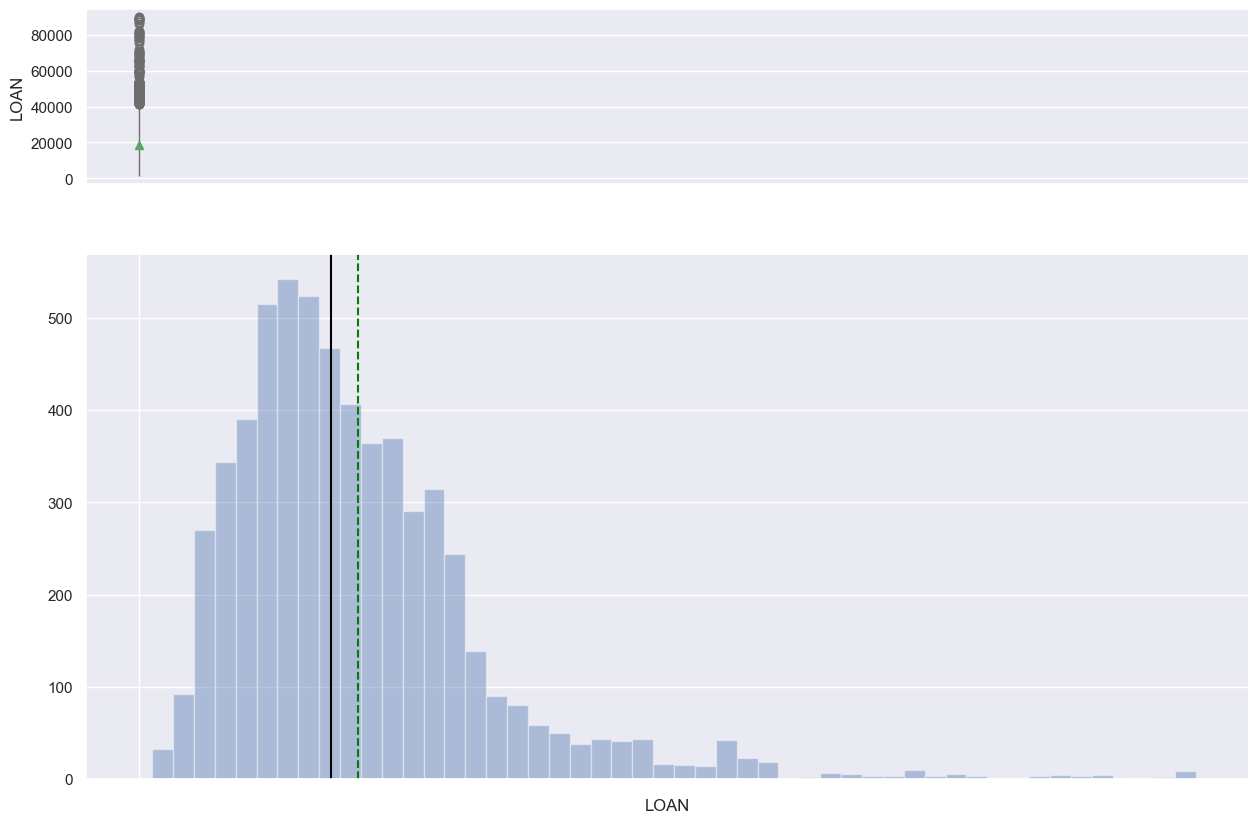

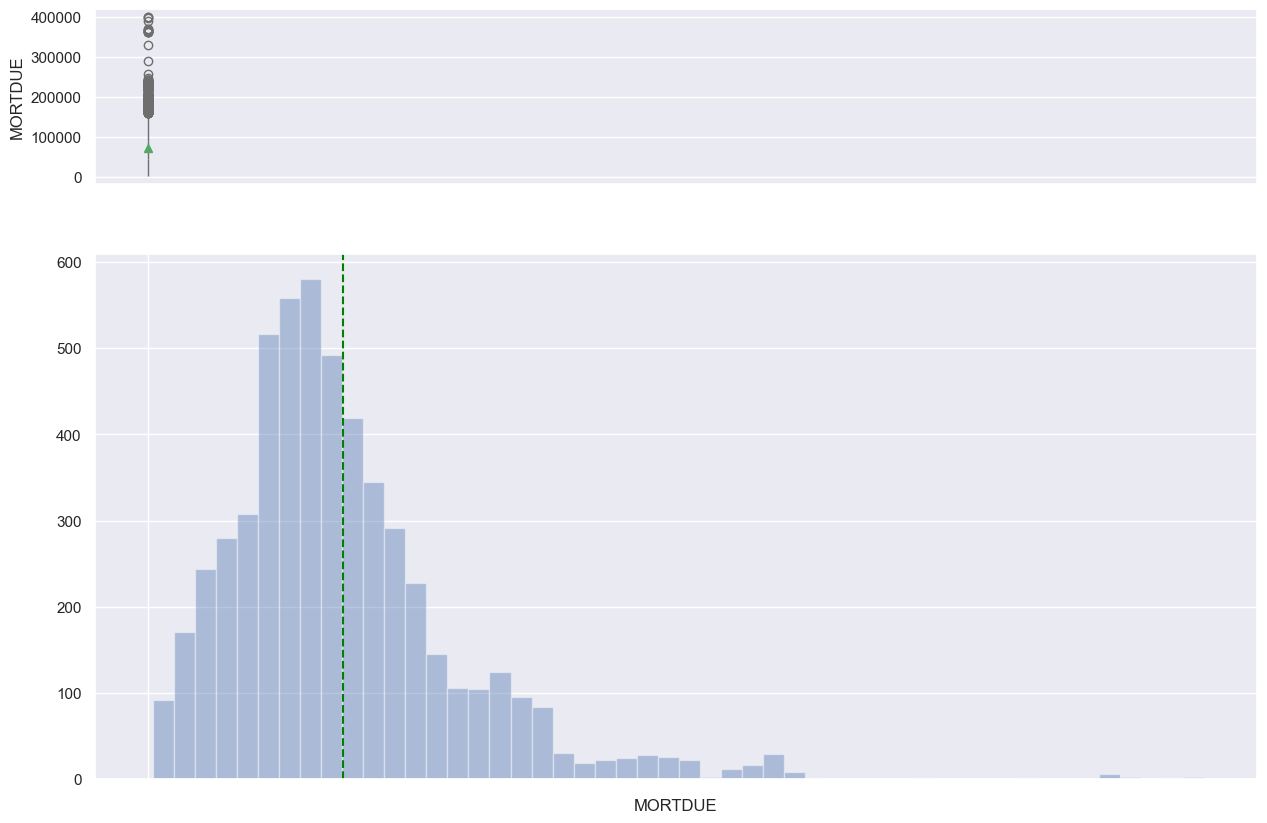

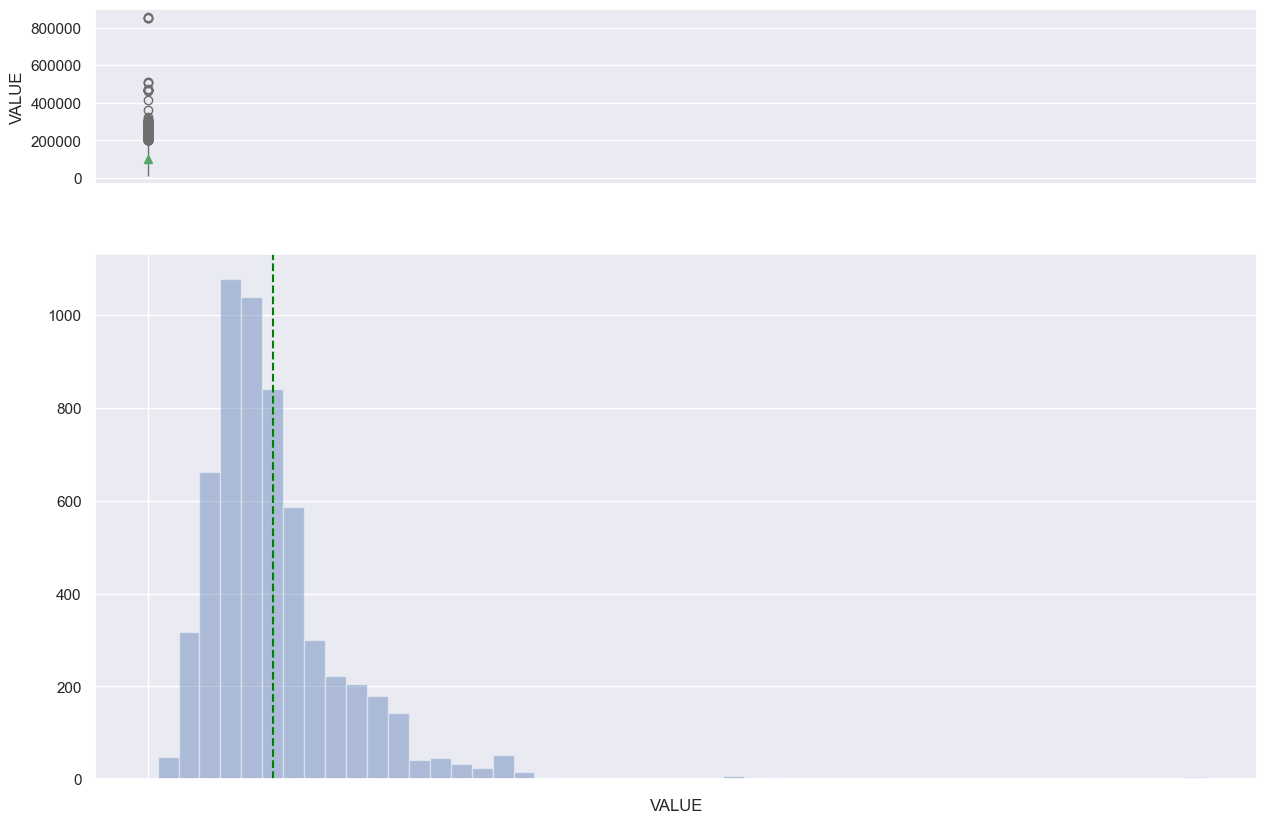

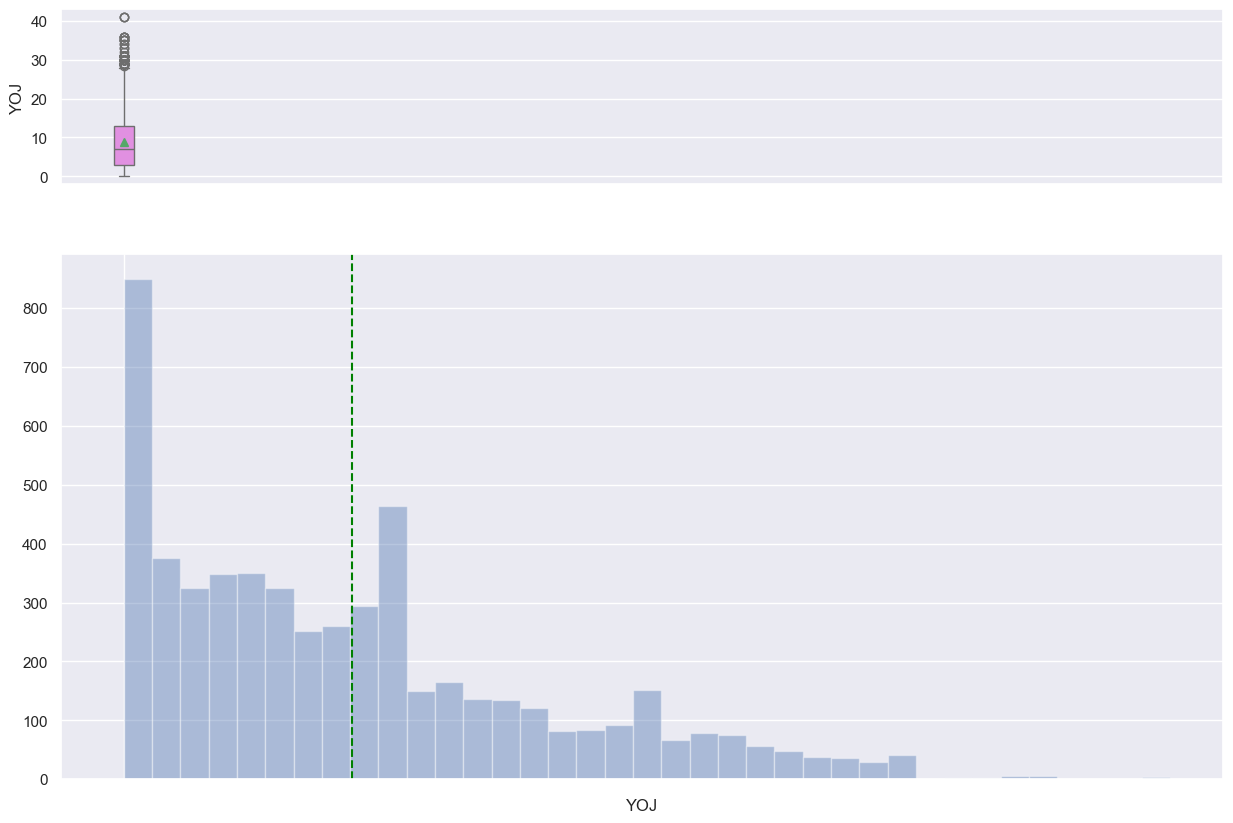

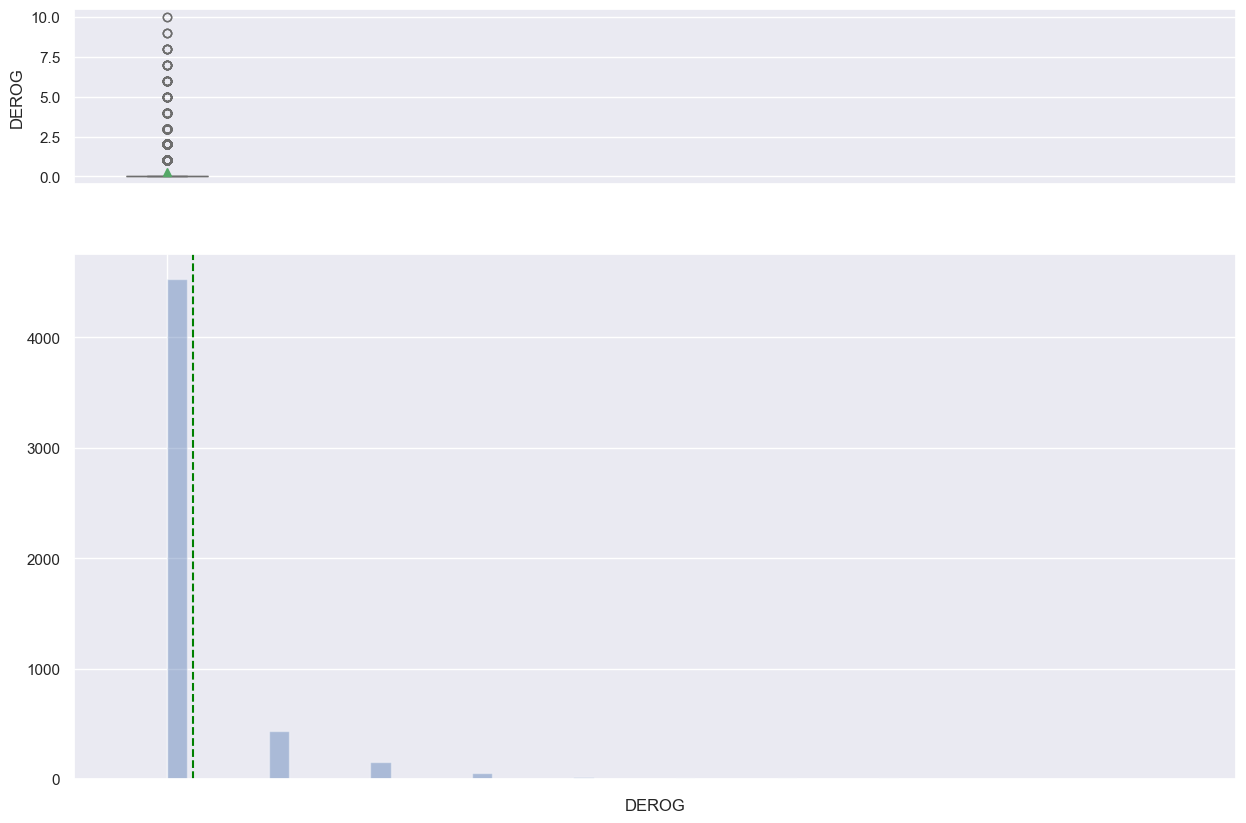

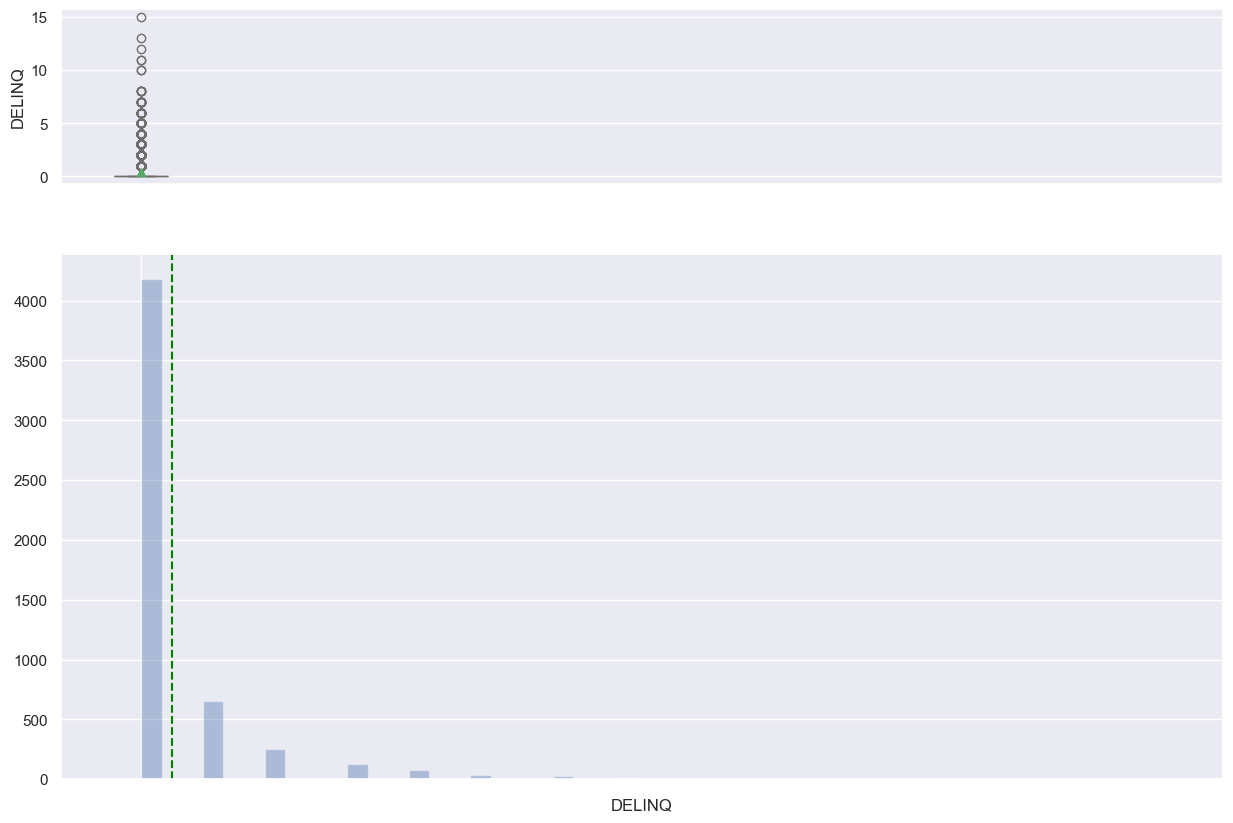

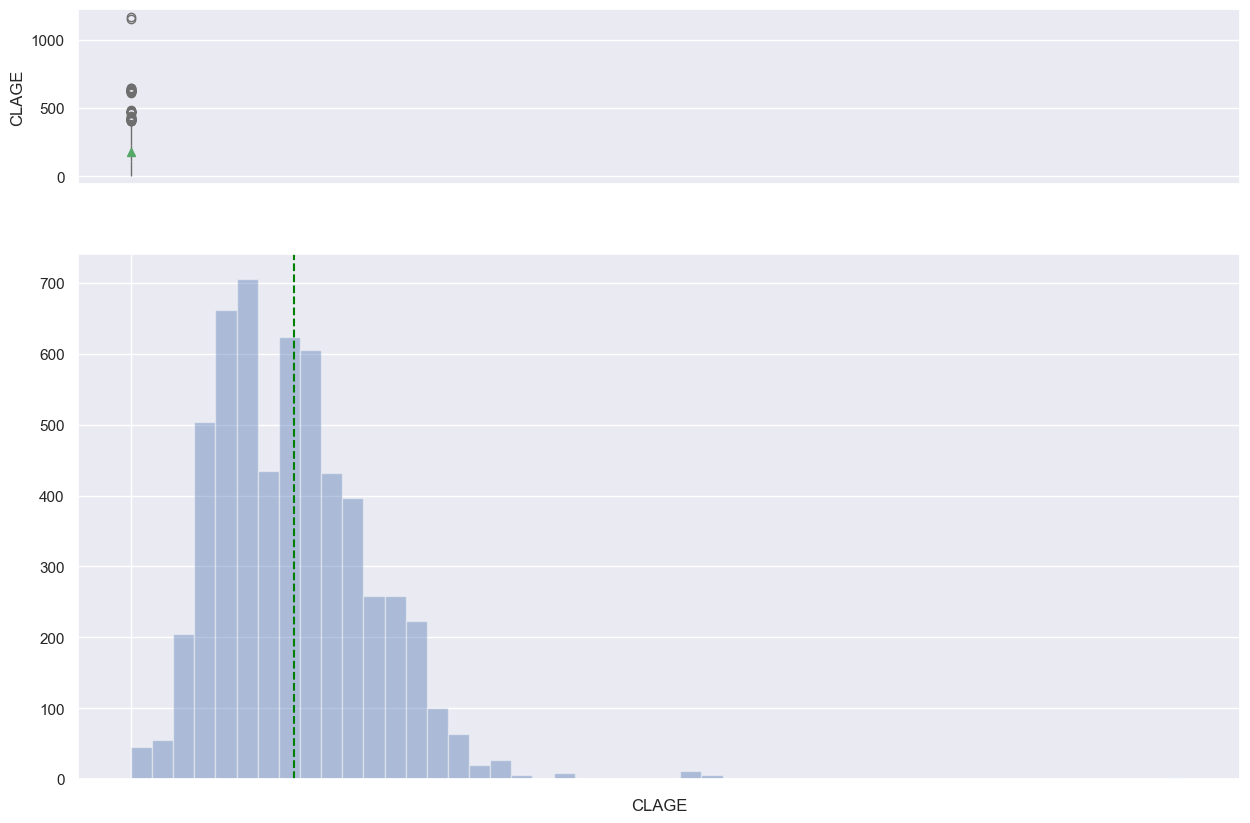

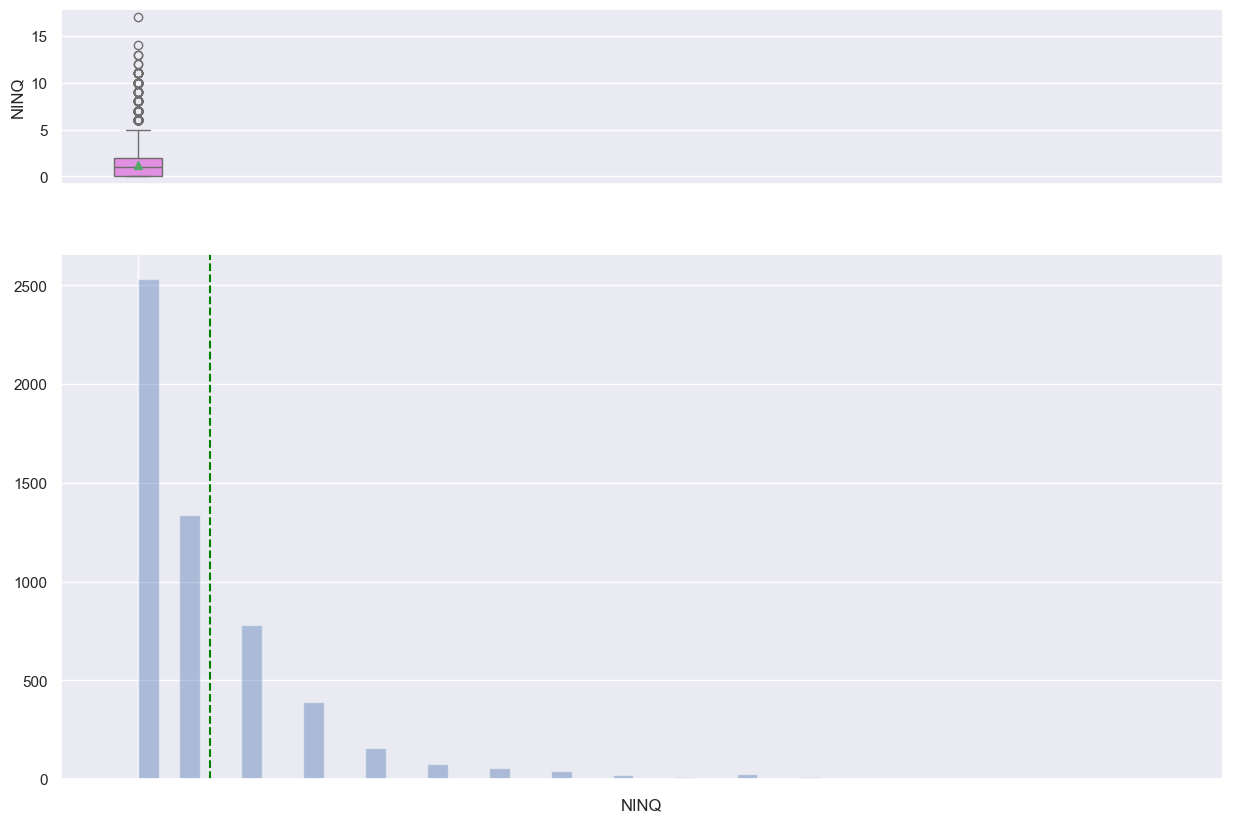

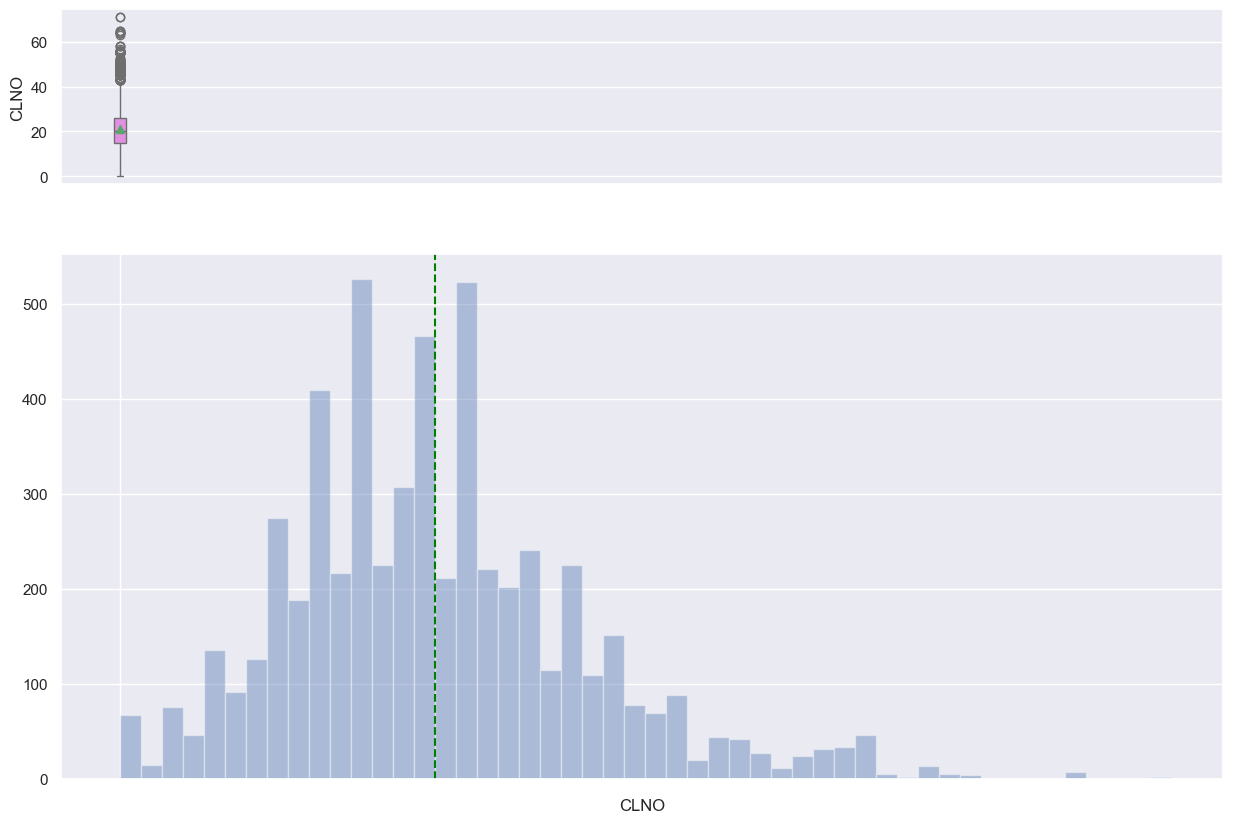

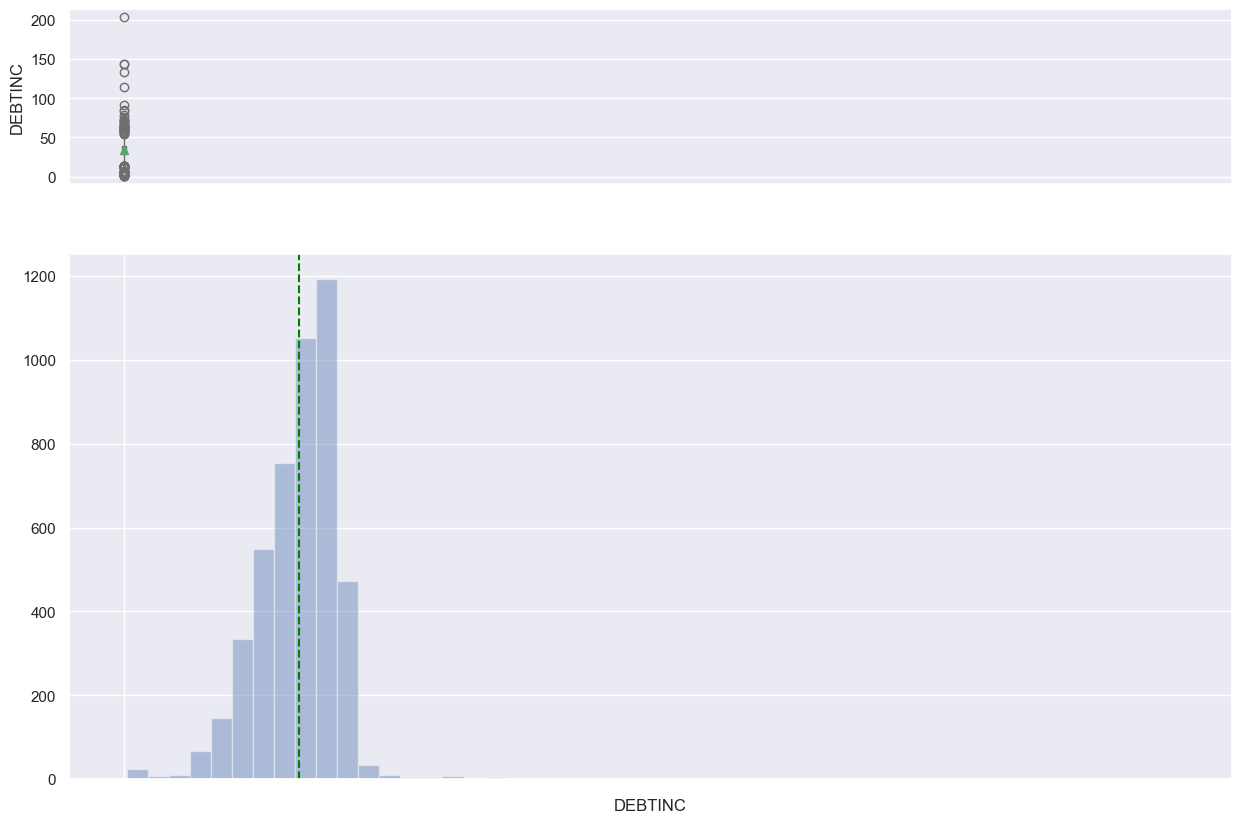

In [15]:
# Building the histogram boxplot for Loan
for i in num_cols:
    histogram_boxplot(data[i])

# 2. Univariate Analysis - Categorical Data

In [16]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage 
        
    plt.show() # show the plot

# Analyze Barplot for DELINQ

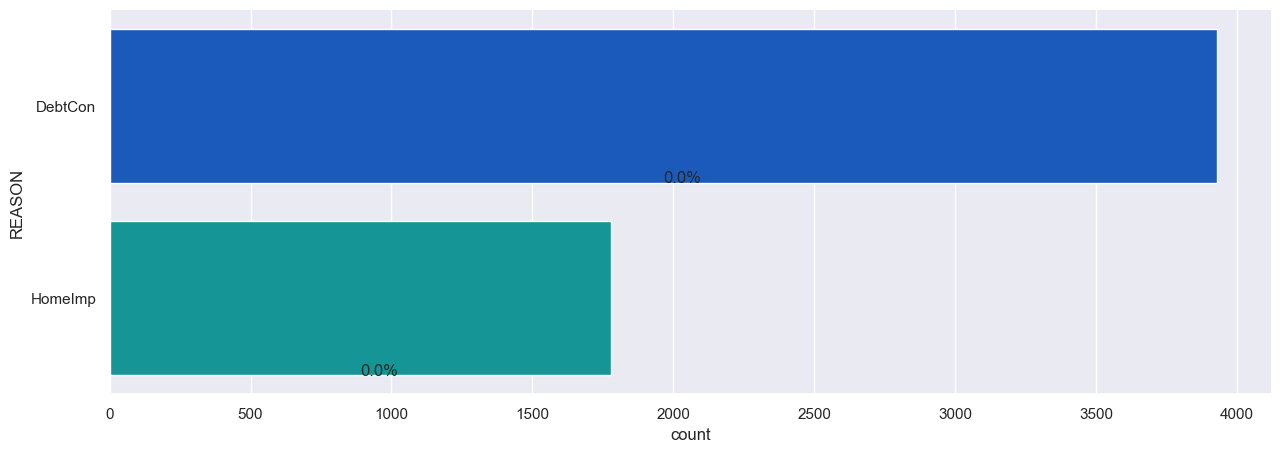

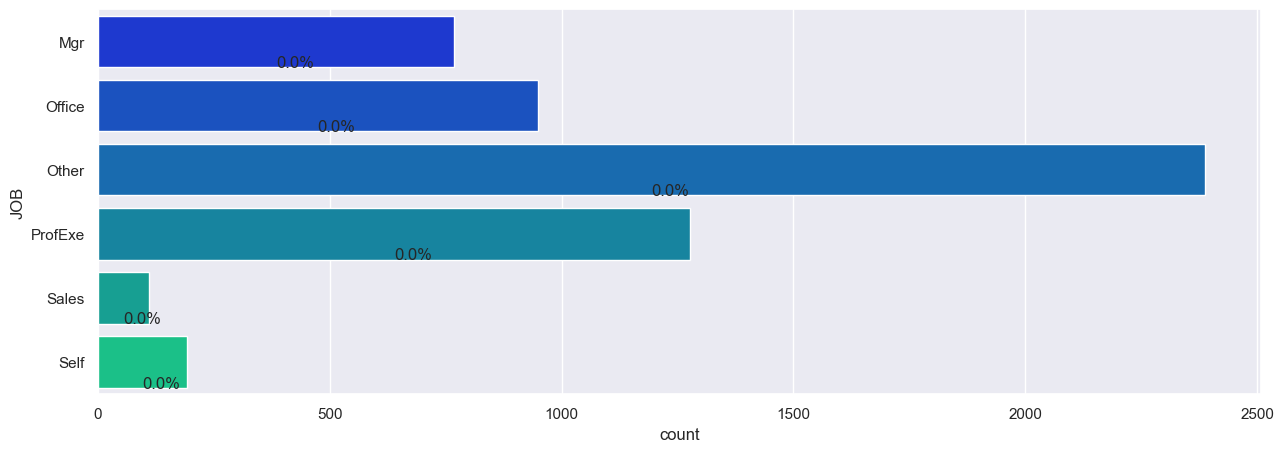

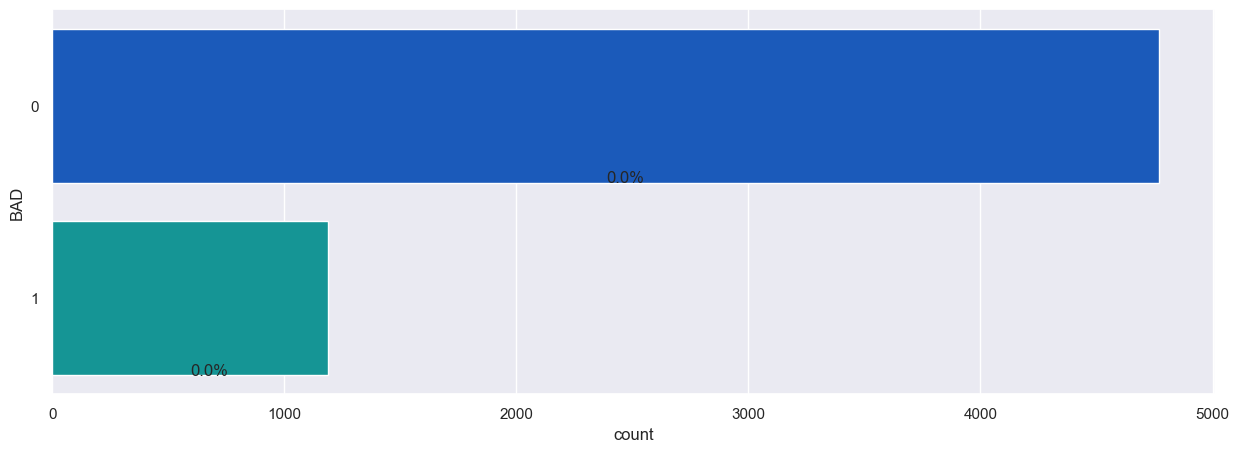

In [17]:
#Building barplot for DELINQ

for i in cols:
    plt.figure(figsize=(15,5))
    ax = sns.countplot(data[i],palette='winter')
    perc_on_bar(ax,data[i])

# Bivariate Analysis
Bivariate Analysis: Continuous and Categorical Variables
Analyze BAD vs Loan

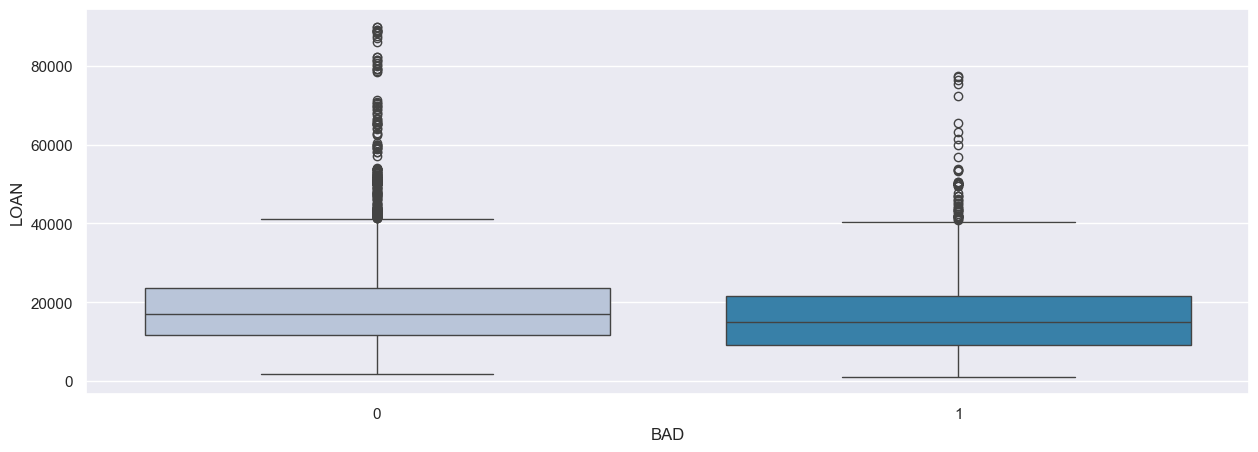

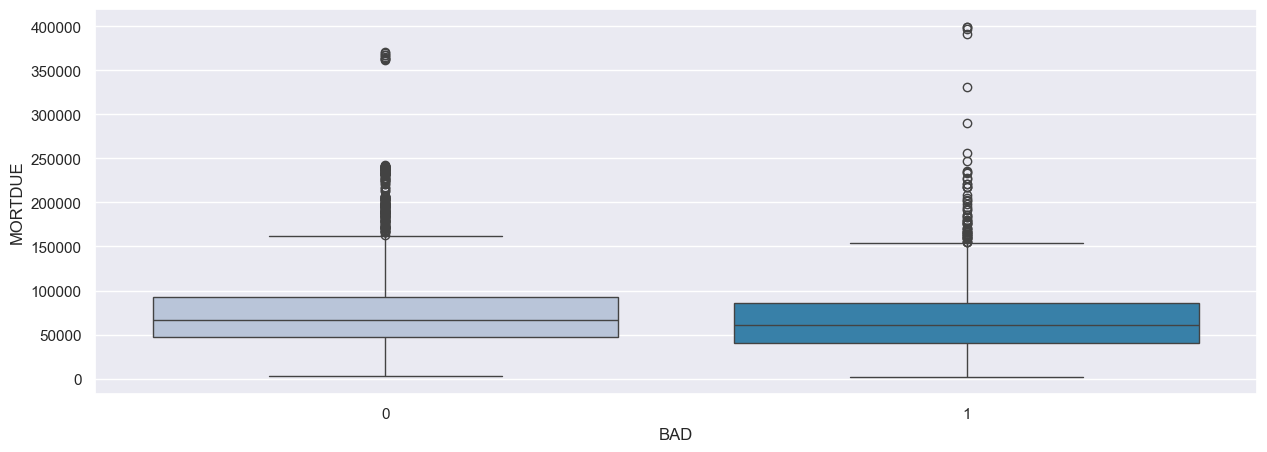

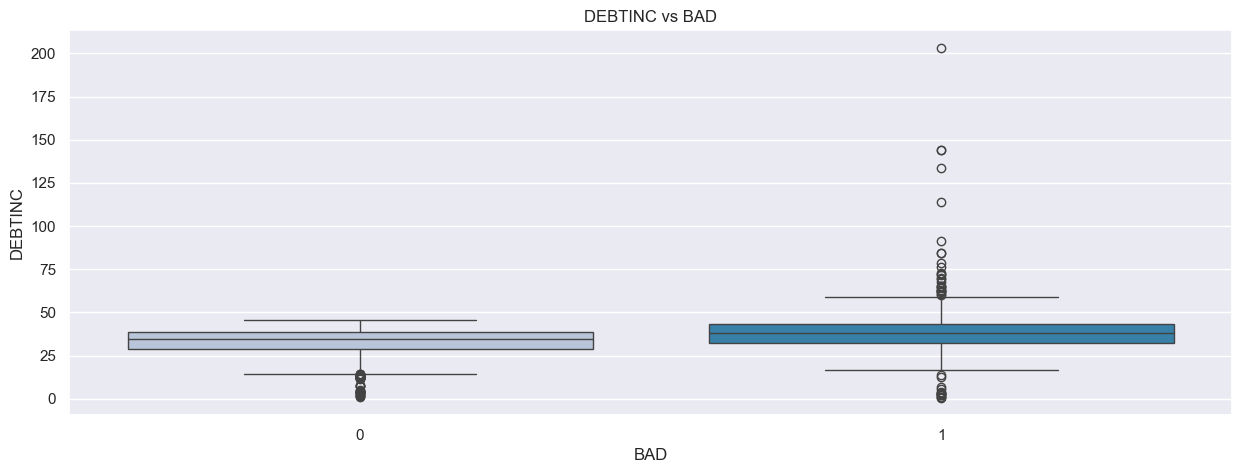

In [18]:
plt.figure(figsize=(15, 5))
sns.boxplot(x="BAD", y="LOAN", data=data, palette="PuBu")
plt.show()

plt.figure(figsize=(15, 5))
sns.boxplot(x="BAD", y="MORTDUE", data=data, palette="PuBu")
plt.show()

plt.figure(figsize=(15, 5))
sns.boxplot(x="BAD", y="DEBTINC", data=data, palette="PuBu")
plt.title("DEBTINC vs BAD")
plt.show()



Insights

BAD vs LOAN: it seems that independently of the type of client (defaulted or not) they receive the same amount of loans.
BAD vs MORTDUE: it seems that independently of the type of client (defaulted or not) they have the same amount due on the existing mortgage.
BAD vs VALUE: it seems that independently of the type of client (defaulted or not) there is no difference in the current value of the property.
BAD vs DEBTINC: both type of clients seems to have very similar ratio.

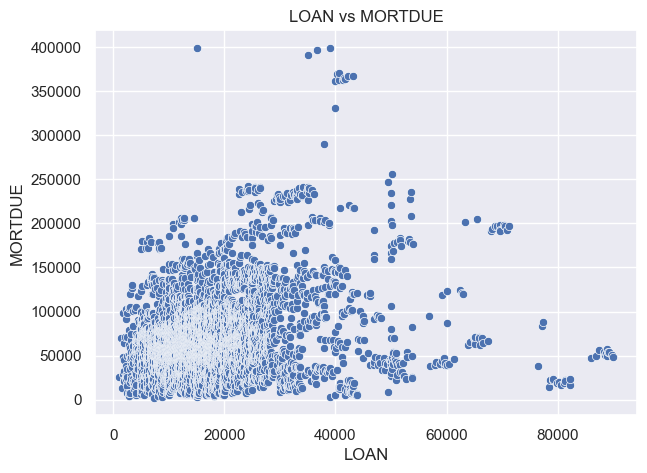

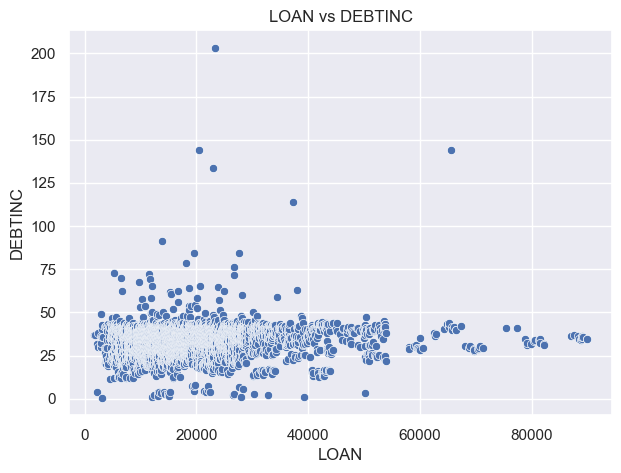

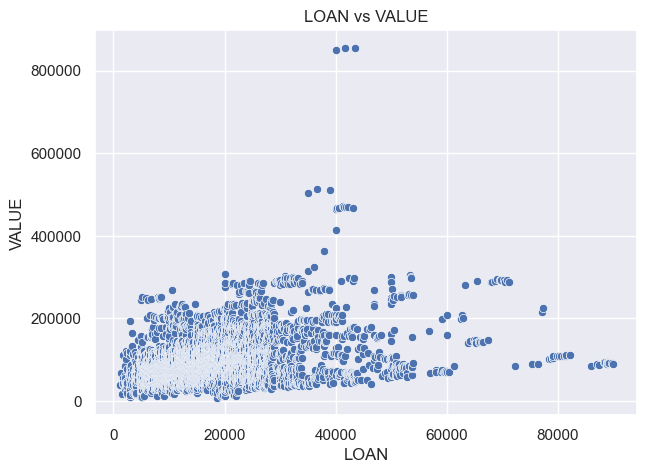

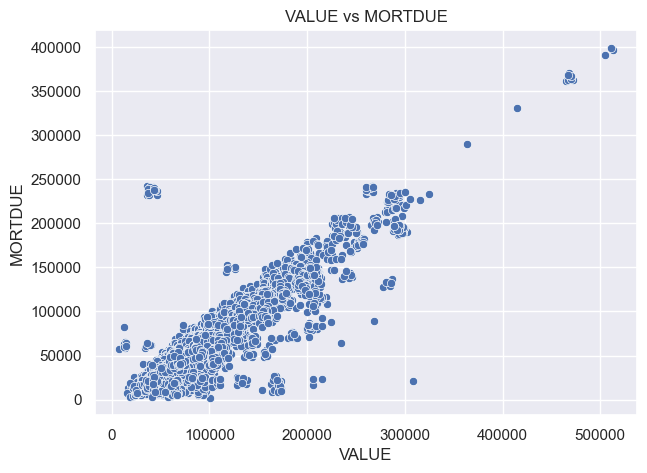

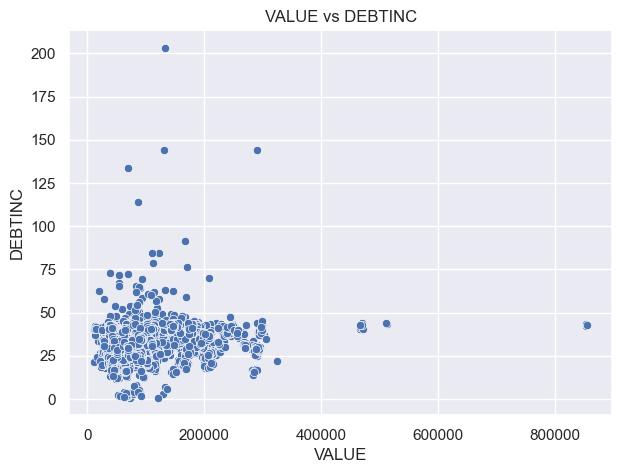

In [19]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x="LOAN", y="MORTDUE", data=data)
plt.title("LOAN vs MORTDUE")
plt.show()

plt.figure(figsize=(7, 5))
sns.scatterplot(x="LOAN", y="DEBTINC", data=data)
plt.title("LOAN vs DEBTINC")
plt.show()

plt.figure(figsize=(7, 5))
sns.scatterplot(x="LOAN", y="VALUE", data=data)
plt.title("LOAN vs VALUE")
plt.show()

plt.figure(figsize=(7, 5))
sns.scatterplot(x="VALUE", y="MORTDUE", data=data)
plt.title("VALUE vs MORTDUE")
plt.show()

plt.figure(figsize=(7, 5))
sns.scatterplot(x="VALUE", y="DEBTINC", data=data)
plt.title("VALUE vs DEBTINC")
plt.show()


Insights:

There is a linear correlation between the variables VALUE and MORTDUE.
There is no linear correlation between any other pair of variables.

# Bivariate Analysis: BAD vs Categorical Variables
The stacked bar chart

In [20]:
### Function to plot stacked bar charts for categorical columns

def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['BAD'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['BAD'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

Plot stacked bar plot for for LOAN and REASON

BAD         0     1   All
REASON                   
DebtCon  3183   745  3928
HomeImp  1384   396  1780
All      4567  1141  5708
------------------------------------------------------------------------------------------------------------------------


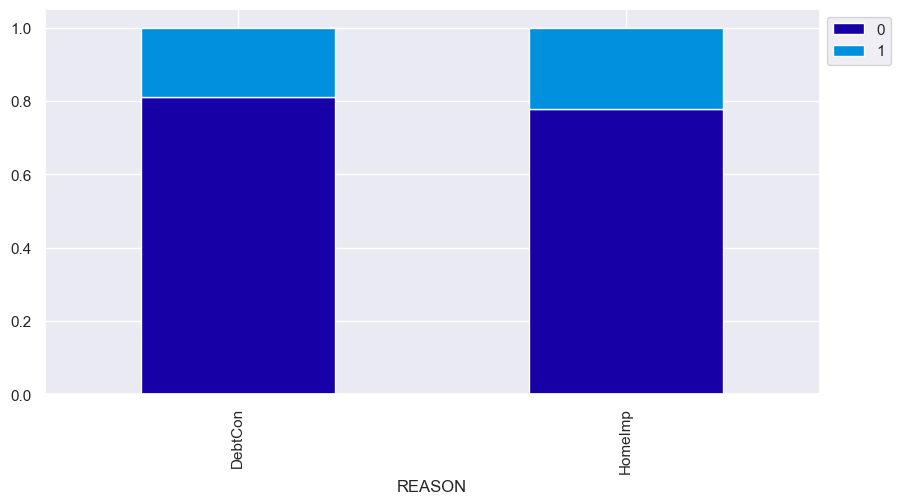

BAD         0     1   All
JOB                      
Mgr       588   179   767
Office    823   125   948
Other    1834   554  2388
ProfExe  1064   212  1276
Sales      71    38   109
Self      135    58   193
All      4515  1166  5681
------------------------------------------------------------------------------------------------------------------------


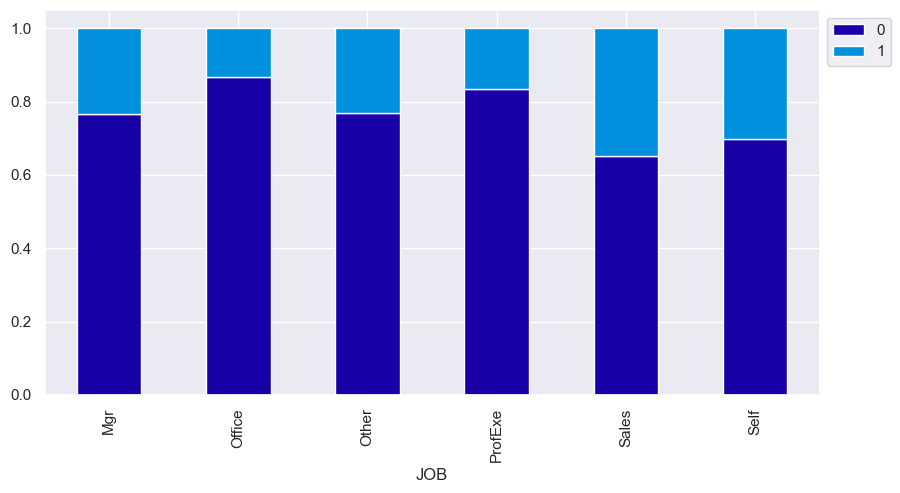

In [21]:
# Plotting stacked bar plot for BAD and REASON
stacked_plot(data['REASON'])
stacked_plot(data['JOB'])


Insights

In the first chart we can see that independently of the loan's reason 80% are non defaulted and 20% are defaulted clients.
In the second chart we can see that people in sales has the highest percentage of defaulted loans.
Office employees and professional executive are the two kind of jobs with the lowest rate of defaulted loans.

# Multivariate Analysis
Analyze Correlation Heatmap for Numerical Variables

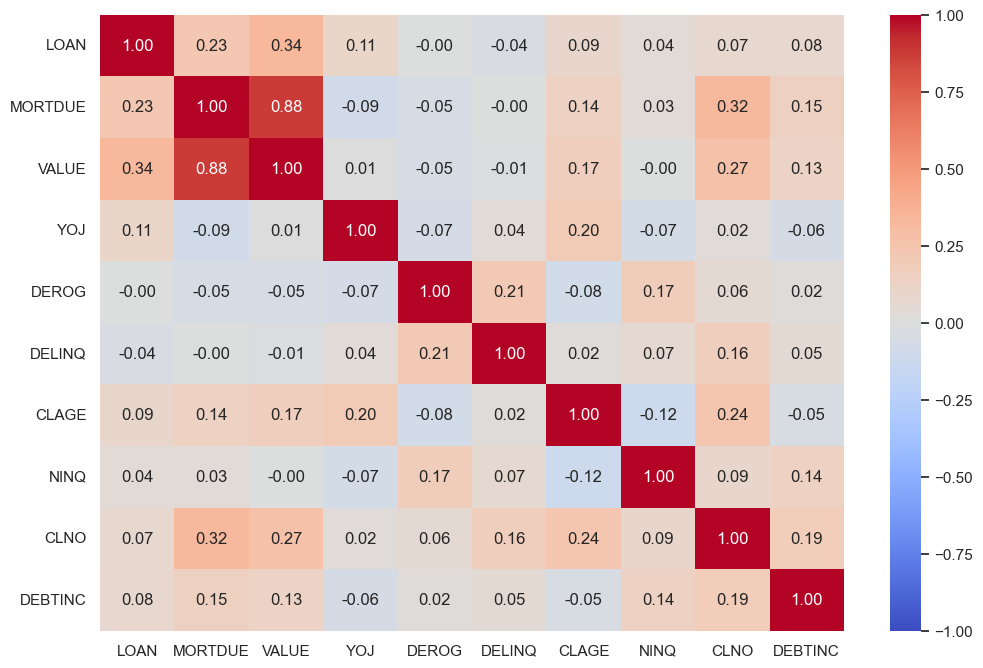

In [22]:
# Separating numerical variables
numerical_col = data.select_dtypes(include=np.number).columns.tolist()

# Building correlation matrix for numerical columns
corr = data[numerical_col].corr()

# plotting the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr,cmap='coolwarm',vmax=1,vmin=-1,
        fmt=".2f",
        annot = True,
        xticklabels=corr.columns,
        yticklabels=corr.columns);

Treating Outliers

In [23]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    
    Q1=df[col].quantile(q = .25) # 25th quantile
    Q3=df[col].quantile(q = .75)  # 75th quantile
    IQR = Q3-Q1   # IQR Range
    Lower_Whisker = Q1 - 1.5*IQR  #define lower whisker
    Upper_Whisker = Q3 + 1.5*IQR  # define upper Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df

In [24]:
df_raw = data.copy()

numerical_col = df_raw.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

df = treat_outliers_all(df_raw,numerical_col)

df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,0.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,41600,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,41600,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,41600,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,41600,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [25]:
#For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0. 
def add_binary_flag(df,col):
    '''
    df: It is the dataframe
    col: it is column which has missing values
    It returns a dataframe which has binary falg for missing values in column col
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    df[new_col] = df[col].isna()
    return df

In [26]:
# list of columns that has missing values in it
missing_col = [col for col in df.columns if df[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(df,colmn)

Filling missing values in numerical columns with median and mode in categorical variables

In [27]:
# Treating Missing values in numerical columns with median and mode in categorical variables

# Select numeric columns.
num_data = df.select_dtypes(include='number')

# Select categorical columns (either 'category' dtype or object strings)
cat_data = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Fill numeric columns with median
df[num_data.columns] = df[num_data.columns].fillna(num_data.median())

# Fill categorical columns with mode
for column in cat_data:
    if df[column].isnull().sum() > 0:
        df[column].fillna(df[column].mode()[0], inplace=True)


In [28]:

df.isnull().sum()

BAD                            0
LOAN                           0
MORTDUE                        0
VALUE                          0
REASON                         0
JOB                            0
YOJ                            0
DEROG                          0
DELINQ                         0
CLAGE                          0
NINQ                           0
CLNO                           0
DEBTINC                        0
MORTDUE_missing_values_flag    0
VALUE_missing_values_flag      0
REASON_missing_values_flag     0
JOB_missing_values_flag        0
YOJ_missing_values_flag        0
DEROG_missing_values_flag      0
DELINQ_missing_values_flag     0
CLAGE_missing_values_flag      0
NINQ_missing_values_flag       0
CLNO_missing_values_flag       0
DEBTINC_missing_values_flag    0
dtype: int64

In [29]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,...,VALUE_missing_values_flag,REASON_missing_values_flag,JOB_missing_values_flag,YOJ_missing_values_flag,DEROG_missing_values_flag,DELINQ_missing_values_flag,CLAGE_missing_values_flag,NINQ_missing_values_flag,CLNO_missing_values_flag,DEBTINC_missing_values_flag
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,...,False,False,False,False,False,False,False,False,False,True
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,0.0,121.833333,...,False,False,False,False,False,False,False,False,False,True
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,...,False,False,False,False,False,False,False,False,False,True
3,1,1500,65019.0,89235.5,DebtCon,Other,7.0,0.0,0.0,173.466667,...,True,True,True,True,True,True,True,True,True,True
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,...,False,False,False,False,False,False,False,False,False,True


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   BAD                          5960 non-null   category
 1   LOAN                         5960 non-null   int64   
 2   MORTDUE                      5960 non-null   float64 
 3   VALUE                        5960 non-null   float64 
 4   REASON                       5960 non-null   category
 5   JOB                          5960 non-null   category
 6   YOJ                          5960 non-null   float64 
 7   DEROG                        5960 non-null   float64 
 8   DELINQ                       5960 non-null   float64 
 9   CLAGE                        5960 non-null   float64 
 10  NINQ                         5960 non-null   float64 
 11  CLNO                         5960 non-null   float64 
 12  DEBTINC                      5960 non-null   float64 
 13  MOR

# Droping missing value flags

In [31]:
#creating a list of bool features
bool_cols = df.select_dtypes(['bool']).columns.tolist()

#droping missing value flags
X = df.drop(columns = bool_cols)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5960 non-null   float64 
 3   VALUE    5960 non-null   float64 
 4   REASON   5960 non-null   category
 5   JOB      5960 non-null   category
 6   YOJ      5960 non-null   float64 
 7   DEROG    5960 non-null   float64 
 8   DELINQ   5960 non-null   float64 
 9   CLAGE    5960 non-null   float64 
 10  NINQ     5960 non-null   float64 
 11  CLNO     5960 non-null   float64 
 12  DEBTINC  5960 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


 # Data Preparation
 Separating the target variable from other variables

In [32]:
# Separating the target variable and other variables
Y = X.BAD
X = X.drop(columns = ['BAD'])

# Creating dummy variables for the categorical variables

# Creating the list of columns for which we need to create the dummy variables
to_get_dummies_for = ['REASON', 'JOB']

# Creating dummy variables
X = pd.get_dummies(data = X, columns = to_get_dummies_for, drop_first = True)      

# Scaling the data
In this case features have different scales, so we will use the Standard Scaler method, which centers and scales the dataset using the Z-Score.

In [33]:
# Scaling the data
sc = StandardScaler()

X_scaled = sc.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns = X.columns)



We will split the data into 70% training and 30% testing sets. Since the dataset is imbalanced (~80% non-defaulted and ~20% defaulted), we will apply a stratified sampling technique to maintain the class distribution in both the training and testing sets.

In [34]:
# Splitting the data into training and test set

x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.3, random_state = 1, stratify = Y)

# Model Evaluation Criterion

In [35]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Developing a Logistic Regression Model
Logistic Regression is a supervised learning algorithm commonly used for binary classification tasks, where the target variable is categorical with only two possible outcomes. It utilizes the sigmoid function to estimate the probability of an event 

Y occurring, given a set of features 

X, as follows:  
P(Y)=1/(1 + exp(-X))

In [36]:
# Defining the Logistic regression model
lg = LogisticRegression()

# Fitting the model on the training data 
lg.fit(x_train,y_train)

LogisticRegression()

 # Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      3340
           1       0.64      0.09      0.15       832

    accuracy                           0.81      4172
   macro avg       0.73      0.54      0.52      4172
weighted avg       0.78      0.81      0.74      4172



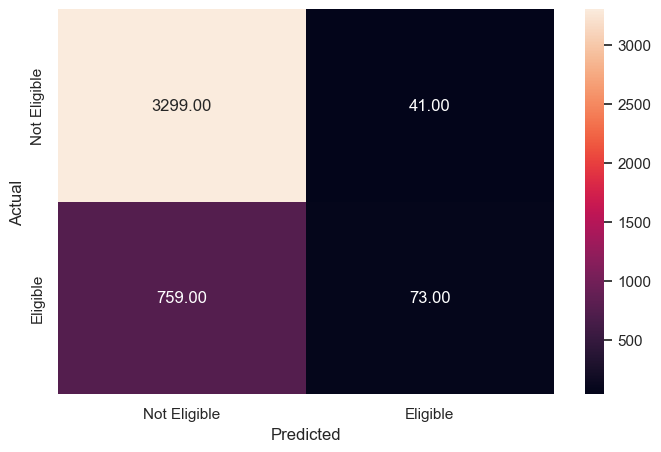

In [37]:
#Predicting for train set
y_pred_train = lg.predict(x_train)

#checking the performance on the train dataset
metrics_score(y_train, y_pred_train)


Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1431
           1       0.68      0.08      0.15       357

    accuracy                           0.81      1788
   macro avg       0.75      0.54      0.52      1788
weighted avg       0.79      0.81      0.74      1788



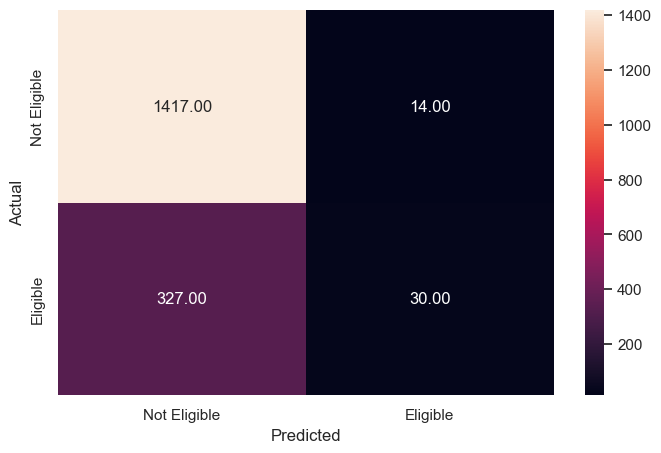

In [38]:
#Predicting for test set
y_pred_test = lg.predict(x_test)

#checking the performance on the test dataset
metrics_score(y_test, y_pred_test)

Observations:

The model achieves approximately 81% accuracy on both training and testing datasets.

Precision for class 1 (defaulted) is moderate (~64-68%), but recall is extremely low (8-9%), indicating poor detection of defaulters.

High recall for class 0 (non-defaulted) shows the model is biased toward predicting the majority class.

The low F1-score for class 1 reflects an imbalance in effectively identifying loan defaulters.

Due to the poor recall for defaulters, the model is not reliable for applications where identifying potential loan defaults is critical for decision-making.

Let’s examine the coefficients to identify which variables are significant and how they influence the loan approval process

In [39]:
# Printing the coefficients of logistic regression

cols = X_scaled.columns

coef_lg = lg.coef_

pd.DataFrame(coef_lg,columns = cols).T.sort_values(by = 0, ascending = False)

,0
DEBTINC,0.417300
NINQ,0.291990
REASON_HomeImp,0.148752
JOB_Sales,0.082408
JOB_Self,0.070921
VALUE,0.052825
CLNO,0.047086
DEROG,0.000000
DELINQ,0.000000
YOJ,-0.055167


Key Observations from Logistic Regression Coefficients:

Higher default risk is linked to higher DEBTINC, NINQ, and REASON_HomeImp.

Lower default risk is linked to higher CLAGE, MORTDUE, and LOAN.

Some job types like Sales and Self increase risk slightly, while Office, Other, and ProfExe reduce it.

DEROG and DELINQ have no effect in the model (coefficient = 0).

DEBTINC is the most important factor influencing default risk.



The Precision-Recall Curve for Logistic Regression

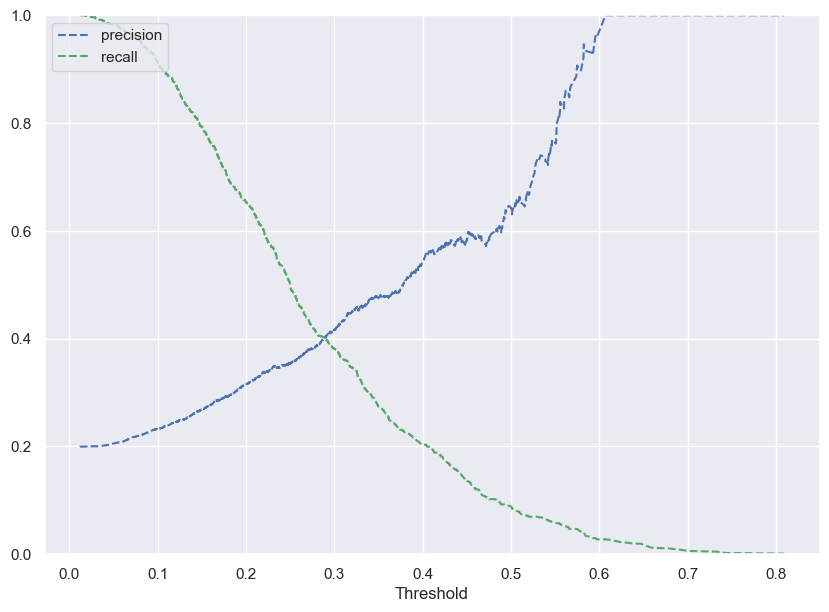

In [40]:
y_scores_lg = lg.predict_proba(x_train) # predict_proba gives the probability of each observation belonging to each class


precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:, 1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize = (10, 7))

plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label = 'precision')

plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')

plt.xlabel('Threshold')

plt.legend(loc = 'upper left')

plt.ylim([0, 1])

plt.show()

Observation:

We can see that the precision and the recall are balanced for a threshold of about 0.28.

Let's find out the performance of the model at this threshold.

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      3340
           1       0.39      0.41      0.40       832

    accuracy                           0.75      4172
   macro avg       0.62      0.62      0.62      4172
weighted avg       0.76      0.75      0.76      4172



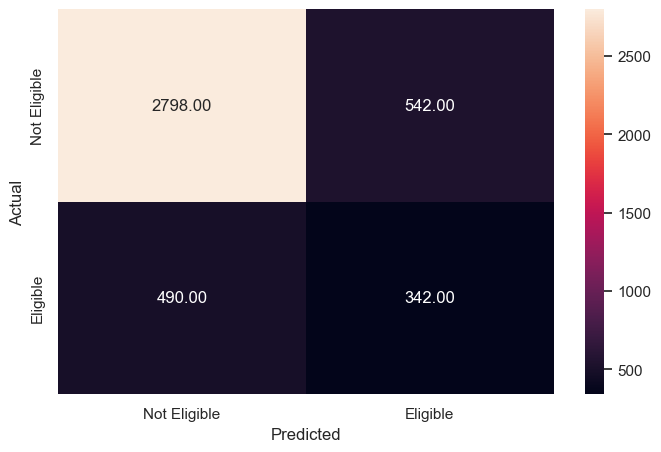

In [41]:
optimal_threshold1 = .28

y_pred_train = lg.predict_proba(x_train)

metrics_score(y_train, y_pred_train[:, 1] > optimal_threshold1)

Interpretation:
	•	Your model performs well on “Not Eligible” (majority class) but poorly on “Eligible” (minority class).
	•	This usually means your model is biased toward predicting the majority class.
	•	This could be due to class imbalance — only 832 out of 4172 samples are “Eligible”.


    

The model performance has improved. The recall has increased significantly for class 1 to 41%.
Let's check the performance on the test data.

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1431
           1       0.39      0.41      0.40       357

    accuracy                           0.76      1788
   macro avg       0.62      0.63      0.62      1788
weighted avg       0.76      0.76      0.76      1788



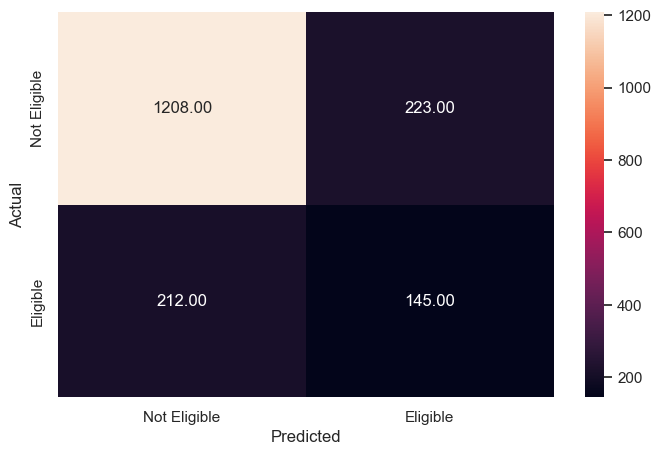

In [42]:
optimal_threshold1 = .28

y_pred_test = lg.predict_proba(x_test)

metrics_score(y_test, y_pred_test[:, 1] > optimal_threshold1)

# Build a Decision Tree Model
Observation: We aren't going to treat de outliers in order to build the model because small changes in the training data can result in a large change in the tree and consequently the final predictions.

Data Preparation for the tree based model

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   BAD                          5960 non-null   category
 1   LOAN                         5960 non-null   int64   
 2   MORTDUE                      5960 non-null   float64 
 3   VALUE                        5960 non-null   float64 
 4   REASON                       5960 non-null   category
 5   JOB                          5960 non-null   category
 6   YOJ                          5960 non-null   float64 
 7   DEROG                        5960 non-null   float64 
 8   DELINQ                       5960 non-null   float64 
 9   CLAGE                        5960 non-null   float64 
 10  NINQ                         5960 non-null   float64 
 11  CLNO                         5960 non-null   float64 
 12  DEBTINC                      5960 non-null   float64 
 13  MOR

In [44]:
#copying df to another variable
data = df.copy()

Separating the target variable y and independent variable x

In [45]:
# Separating the target variable and other variables
Y = data.BAD
X = data.drop(columns = ['BAD'])

# Creating the list of columns for which we need to create the dummy variables
to_get_dummies_for = ['REASON', 'JOB']

# Creating dummy variables
X = pd.get_dummies(data = X, columns = to_get_dummies_for, drop_first = True) 
X

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,...,CLAGE_missing_values_flag,NINQ_missing_values_flag,CLNO_missing_values_flag,DEBTINC_missing_values_flag,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262,...,False,False,False,True,True,False,True,False,False,False
1,1300,70053.0,68400.0,7.0,0.0,0.0,121.833333,0.0,14.0,34.818262,...,False,False,False,True,True,False,True,False,False,False
2,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262,...,False,False,False,True,True,False,True,False,False,False
3,1500,65019.0,89235.5,7.0,0.0,0.0,173.466667,1.0,20.0,34.818262,...,True,True,True,True,False,False,True,False,False,False
4,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262,...,False,False,False,True,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,41600,57264.0,90185.0,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347,...,False,False,False,False,False,False,True,False,False,False
5956,41600,54576.0,92937.0,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971,...,False,False,False,False,False,False,True,False,False,False
5957,41600,54045.0,92924.0,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590,...,False,False,False,False,False,False,True,False,False,False
5958,41600,50370.0,91861.0,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882,...,False,False,False,False,False,False,True,False,False,False


# Split the data

In [46]:
# Split the data into training and test set (We use Stratify = 1 because data is unbalanced)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)
#Defining Decision tree model with class weights class_weight={0: 0.2, 1: 0.8}
dt = DecisionTreeClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 1)
#fitting Decision tree model
dt.fit(x_train, y_train)
DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



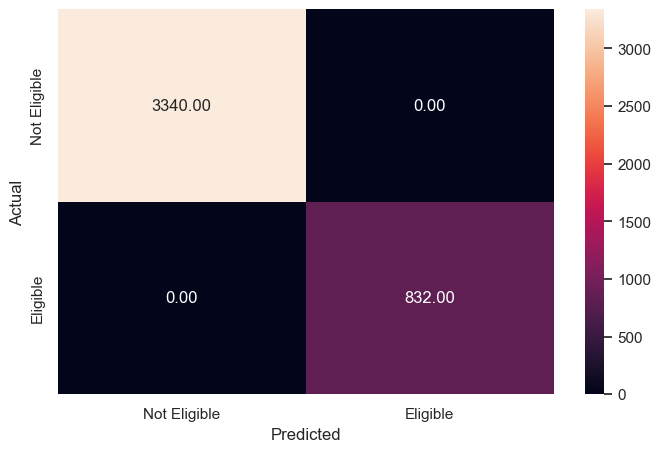

In [47]:
# Checking performance on the training data

y_train_pred_dt = dt.predict(x_train)

metrics_score(y_train, y_train_pred_dt)


Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1431
           1       0.66      0.59      0.62       357

    accuracy                           0.86      1788
   macro avg       0.78      0.76      0.77      1788
weighted avg       0.85      0.86      0.85      1788



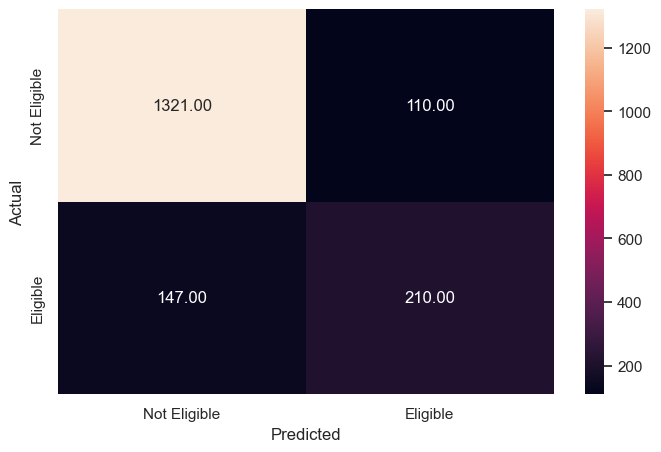

In [48]:
# Checking performance on the testing data

y_test_pred_dt = dt.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

Decision Tree Insights:

The model performs very well on training data but worse on test data — showing signs of overfitting.

Recall drops from 1.00 (train) to 0.62 (test), meaning it misses more defaulters on new data.

There's a 27% false positive rate, which could lead to wrong default predictions and financial loss.

Decision Tree has better recall than Logistic Regression (0.62 vs. 0.41).

We'll use Grid Search to tune hyperparameters and improve model performance.

Next, we’ll plot feature importance to identify which variables matter most.

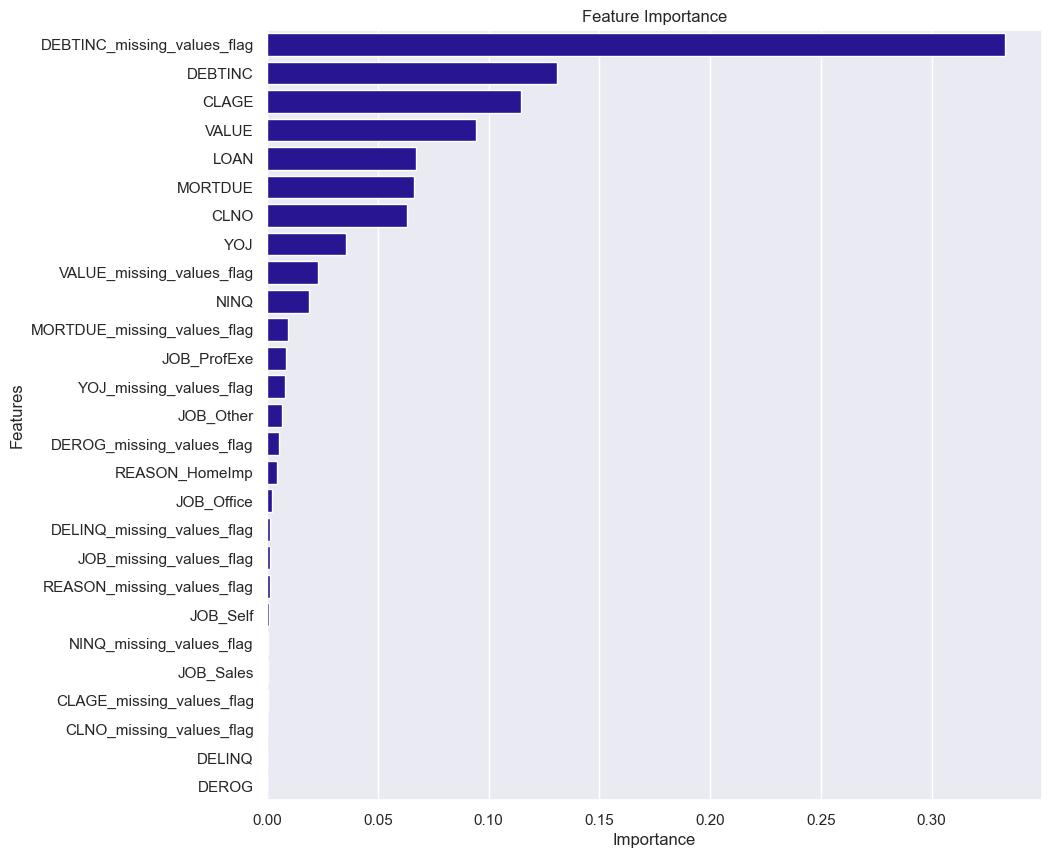

In [49]:
# Plotting the feature importance

importances = dt.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 10))

sns.barplot(x='Importance', y=importance_df.index, data=importance_df)

plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()






**Feature Importance (Decision Tree):**

1. `DEBTINC_missing_values_flag` is the top feature, followed by `DEBTINC`, `CLAGE`, and `LOAN`.
2. Missing `DEBTINC` data may strongly influence loan rejection.
3. Other key features include `MORTDUE` and `VALUE`.

 



# Using GridSearchCV for Hyperparameter tuning on the model

In [52]:
# Choosing the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 7), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = 10)


# Fitting the GridSearch on train dataset
gridCV = gridCV.fit(x_train, y_train)


# Setting the clf to the best combination of parameters
dtree_estimator = gridCV.best_estimator_


# Fitting the best algorithm to the data. 
dtree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=5,
                       min_samples_leaf=10, random_state=1)

Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.95      0.88      0.91      3340
           1       0.62      0.80      0.70       832

    accuracy                           0.86      4172
   macro avg       0.78      0.84      0.80      4172
weighted avg       0.88      0.86      0.87      4172



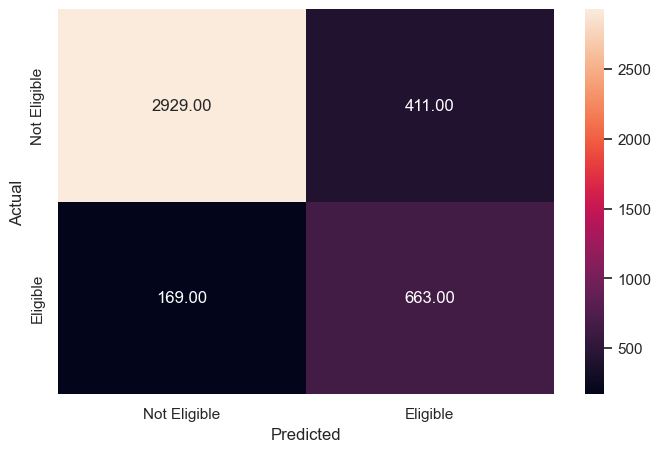

In [53]:
# Checking performance on the training data based on the tuned model

y_train_pred_dt = dtree_estimator.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      1431
           1       0.61      0.76      0.67       357

    accuracy                           0.85      1788
   macro avg       0.77      0.82      0.79      1788
weighted avg       0.87      0.85      0.86      1788



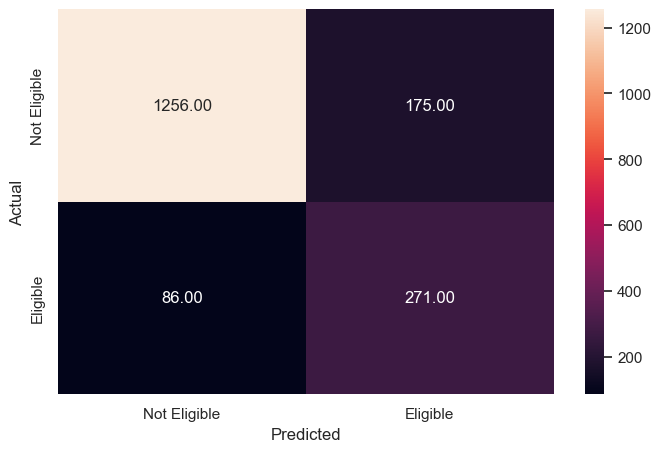

In [65]:
# Checking performance on the testing data based on the tuned model

y_test_pred_dt = dtree_estimator.predict(x_test)

metrics_score(y_test, y_test_pred_dt)



**Insights (After Hyperparameter Tuning):**

1. Training accuracy dropped from 1.00 to 0.74 — a sign that **overfitting has reduced**.
2. **Recall improved** on test data (0.61 → 0.74), meaning better detection of defaulters.
3. The model now performs **consistently** on both train and test sets.
4. **Precision dropped** (0.73 → 0.62), leading to more false positives.
5. More false positives may **increase the risk** of incorrectly labeling good clients as defaulters.



Let's look at the feature importance of this model and try to analyze why this is happening.

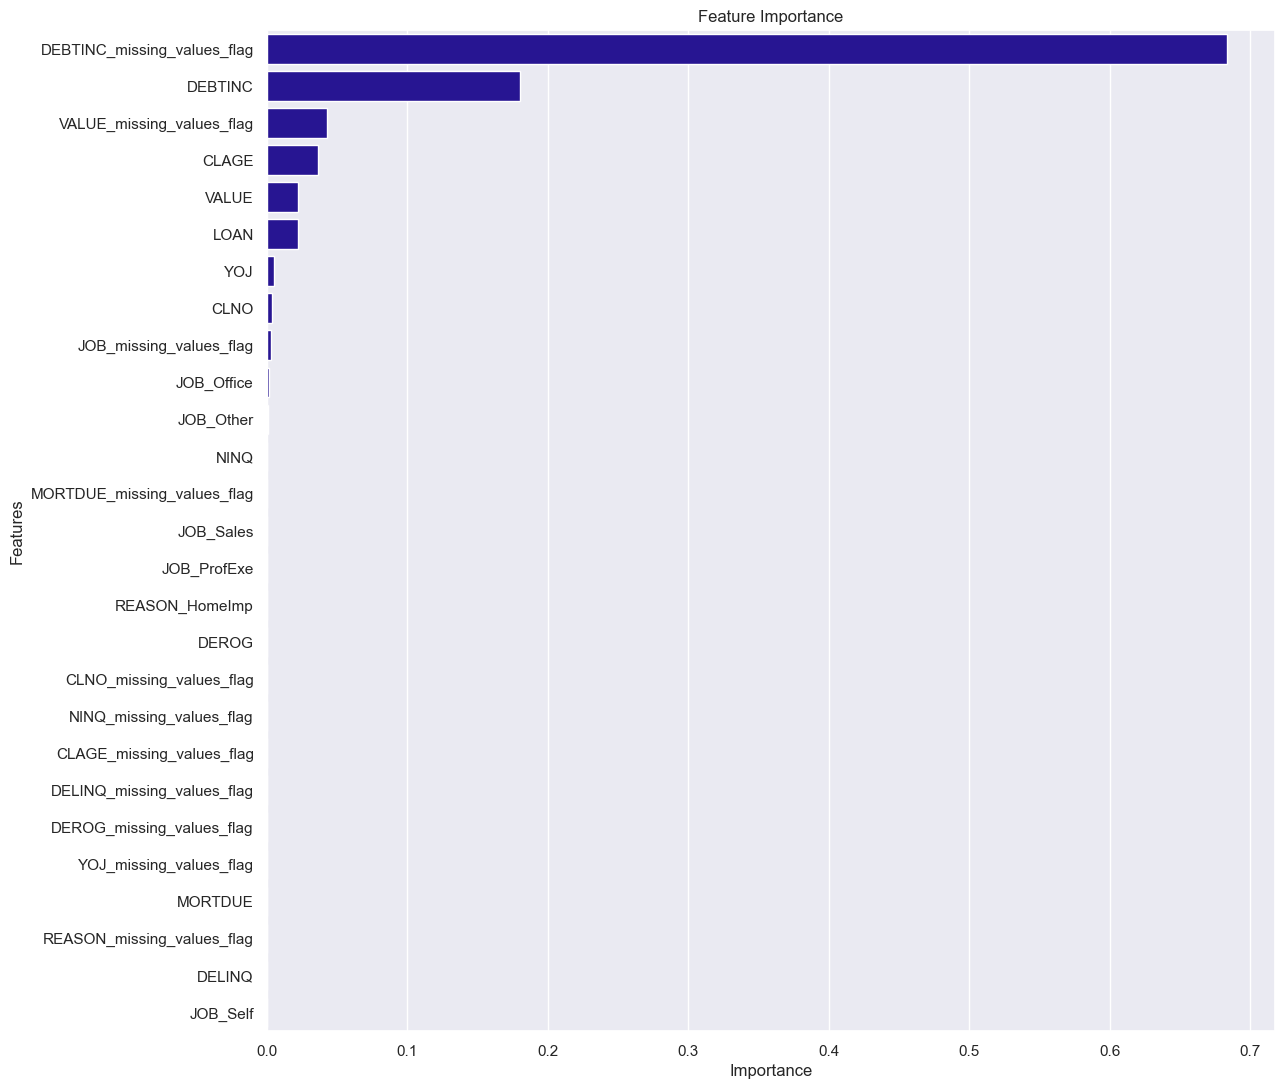

In [67]:
importances = dtree_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(13, 13))

sns.barplot(x='Importance', y=importance_df.index, data=importance_df)

plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


Observations:

After tuning, the model considers only 8 features as important.

This may indicate high bias, as the model has oversimplified the problem.

Key features include: DEBTINC_missing_value, DEBTINC, DELINQ, CLAGE, DEROG, CLNO, MORTDUE, and YOJ.

# Plotting the Decision Tree

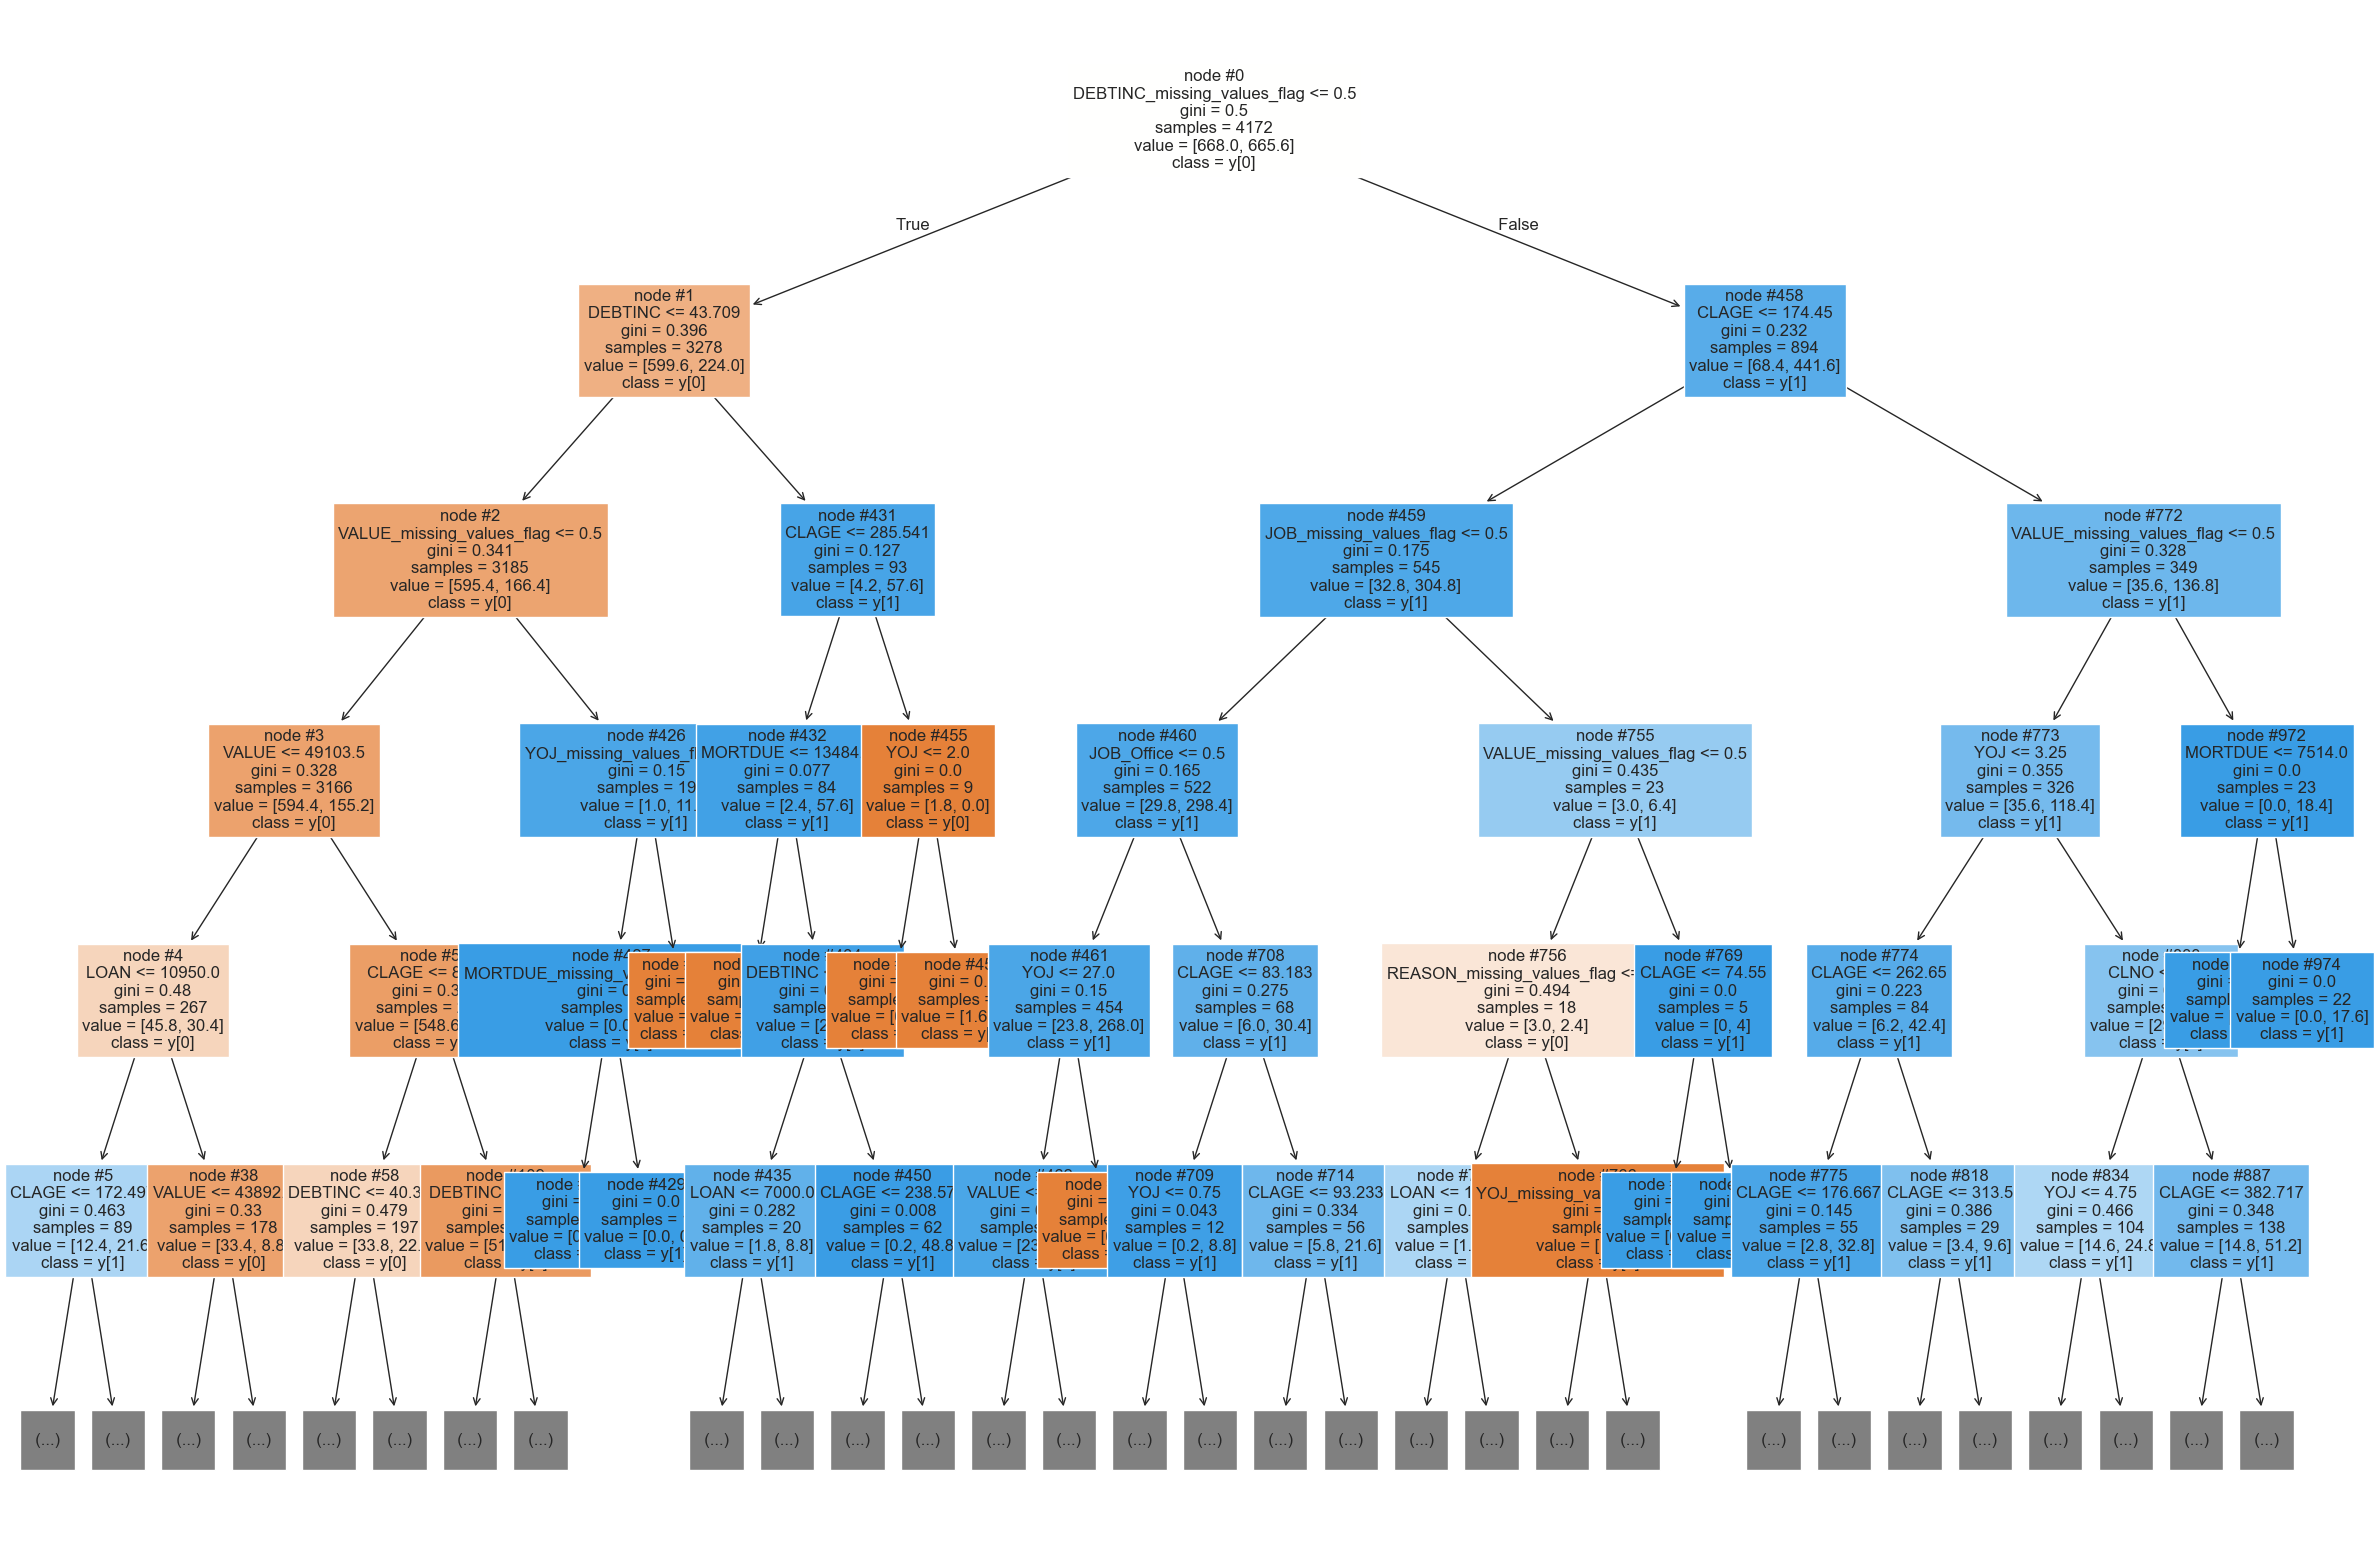

In [54]:
# Plotting the decision  tree and analyze it to build the decision rule

features = list(X.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(dt, max_depth = 5, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

# Note:
Blue leaves represent default cases (y[1]).

Orange leaves represent non-default cases (y[0]).

The darker the color, the more observations that fall into that leaf.

# Business Rules (based on Decision Tree):
If DEBTINC is missing, delinquent lines exist, and CLAGE < 390.6, → High chance of default.

If DEBTINC is missing and no delinquent lines, → High chance of default.

If DEBTINC is present, DEBTINC > 43.7, and CLAGE < 285.5, → Chance of default.

If DEBTINC is present, DEBTINC < 43.7, but derogatory reports exist, → Chance of default.

If DEBTINC < 43.7 and VALUE is missing, → Chance of default.

If DEBTINC < 43.7 and VALUE is present, → High chance of no default.

If DEBTINC > 43.7 and CLAGE > 285.5, → Client won't default.

If DEBTINC is missing, delinquent lines exist, and CLAGE > 390.6, → Client won't default.



# Build a Random Forest model with Class Weights

In [55]:
# Defining Random Forest model with class weights class_weight={0: 0.2, 1: 0.8}
rf_estimator = RandomForestClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 1)

# Fitting Random Forest model
rf_estimator.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



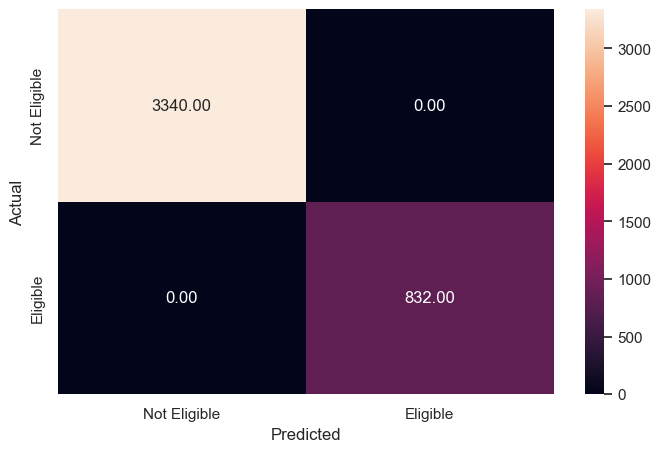

In [56]:
# Checking performance on the train data

y_pred_train_rf = rf_estimator.predict(x_train)

metrics_score(y_train, y_pred_train_rf)

Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1431
           1       0.78      0.64      0.71       357

    accuracy                           0.89      1788
   macro avg       0.85      0.80      0.82      1788
weighted avg       0.89      0.89      0.89      1788



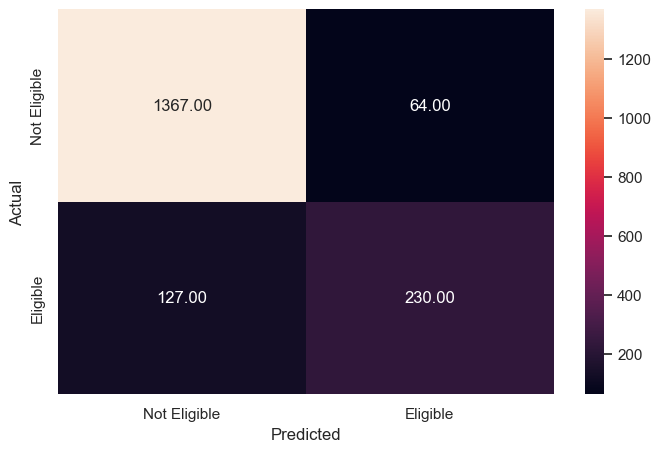

In [57]:
# Checking performance on the test data

y_pred_test_rf = rf_estimator.predict(x_test)

metrics_score(y_test, y_pred_test_rf)

Observations – Random Forest Classifier
The model is still overfitting on the training data.

Recall dropped from 0.68 to 0.63 on test data.

Precision remains high on test data.

Using class_weight={0: 0.2, 1: 0.8} worsened performance.

Balanced class weights ({0: 0.5, 1: 0.5}) gave better results, with recall improving to 0.68.



Plot the Feature importance of the Random Forest

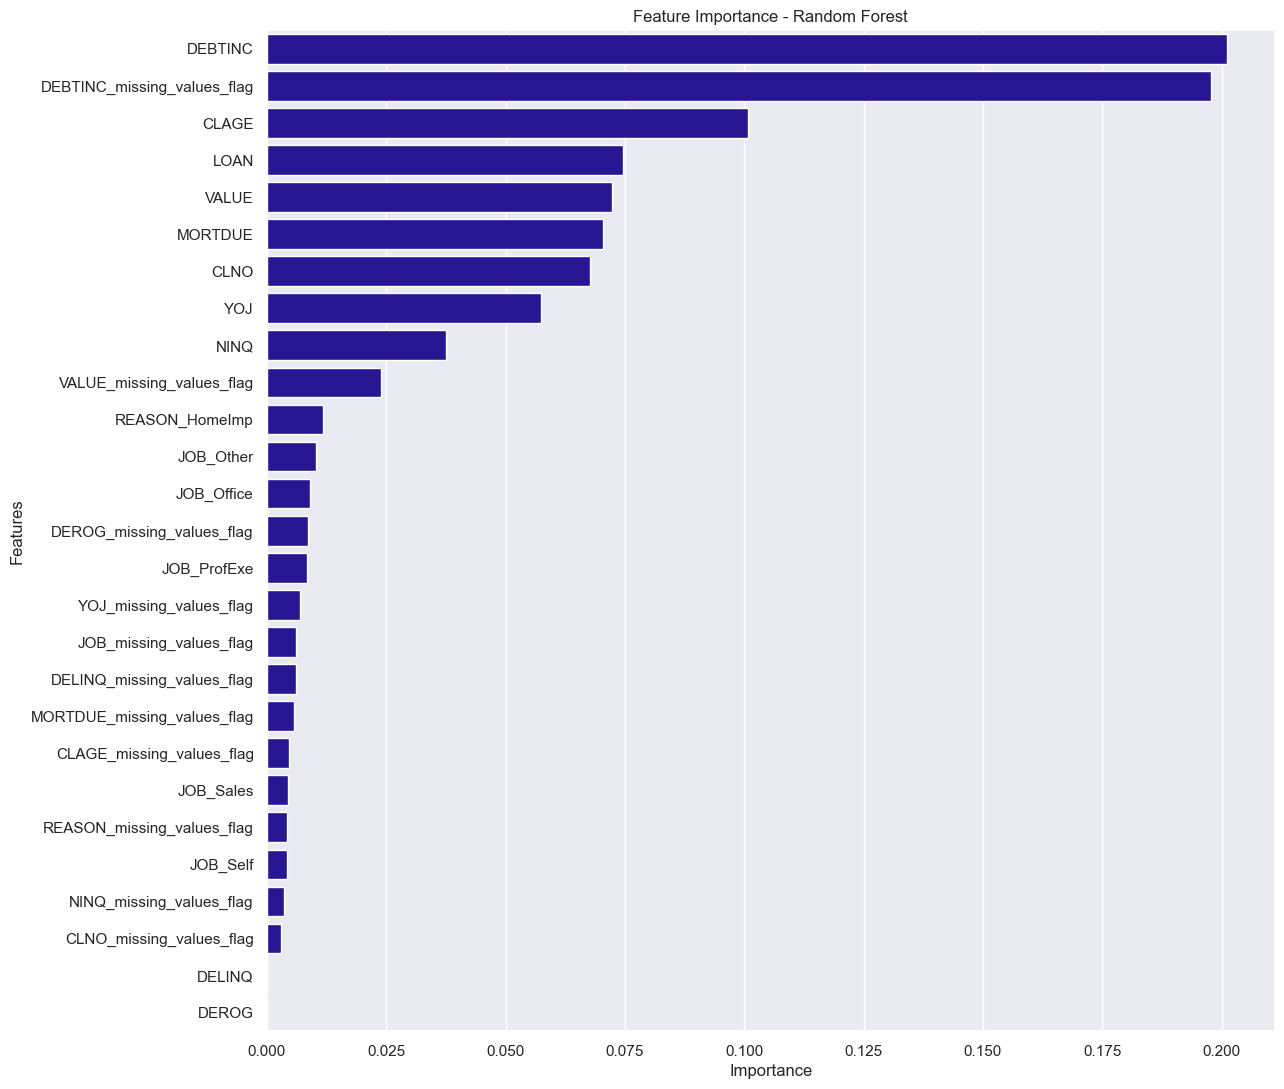

In [58]:
# Importance of features in the tree building
importances = rf_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(13, 13))

# Corrected: use keyword arguments
sns.barplot(x='Importance', y=importance_df.index, data=importance_df)

plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


# Tuning the Random Forest
We’ll use Randomized Search for hyperparameter tuning.
It selects a random subset of combinations from the defined parameter grid, making it faster than exhaustive Grid Search.
Randomized Search also uses cross-validation to evaluate model performance and identify the best parameter set efficiently.

# NOTE: This will take a long time.

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import recall_score
import numpy as np

rf = RandomForestClassifier(random_state=1)

params_rf = {
    "n_estimators": [100, 200],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [0.7, 0.9],
}

scorer = metrics.make_scorer(recall_score, pos_label=1)

search = RandomizedSearchCV(rf, params_rf, scoring=scorer, cv=3, n_iter=6, n_jobs=-1, random_state=1, verbose=1)
search.fit(x_train, y_train)

rf_best = search.best_estimator_
rf_best.fit(x_train, y_train)


Fitting 3 folds for each of 6 candidates, totalling 18 fits


RandomForestClassifier(max_features=0.7, n_estimators=200, random_state=1)

Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



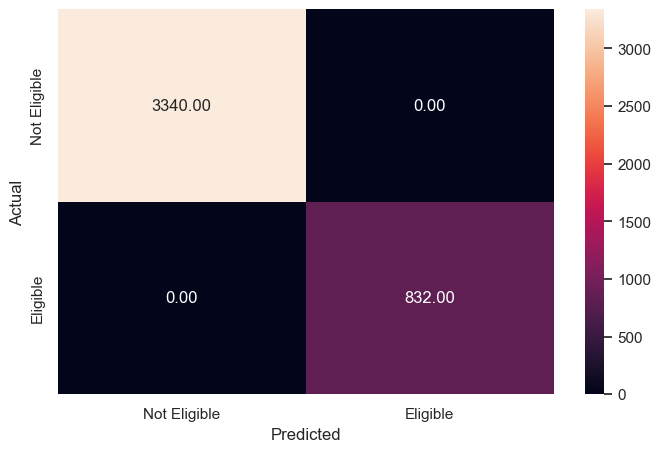

In [66]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(x_train)

metrics_score(y_train, y_pred_train_rf_tuned)

Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1431
           1       0.76      0.64      0.70       357

    accuracy                           0.89      1788
   macro avg       0.84      0.80      0.81      1788
weighted avg       0.88      0.89      0.88      1788



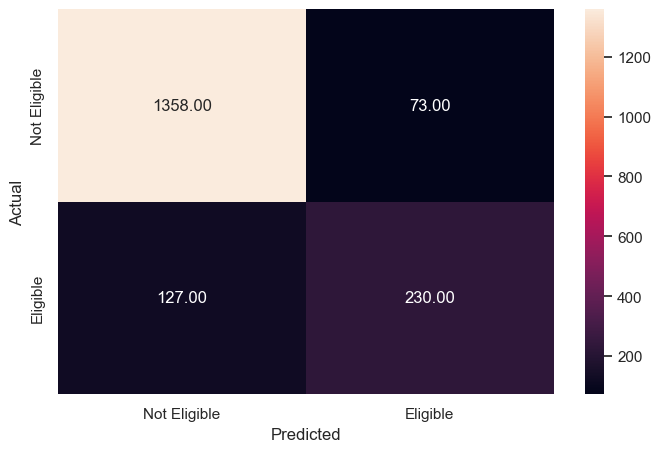

In [67]:
# Checking performace on test dataset
y_pred_test_rf_tuned = rf_estimator_tuned.predict(x_test)

metrics_score(y_test, y_pred_test_rf_tuned)

Plotting the Feature importance of the tuned Random Forest

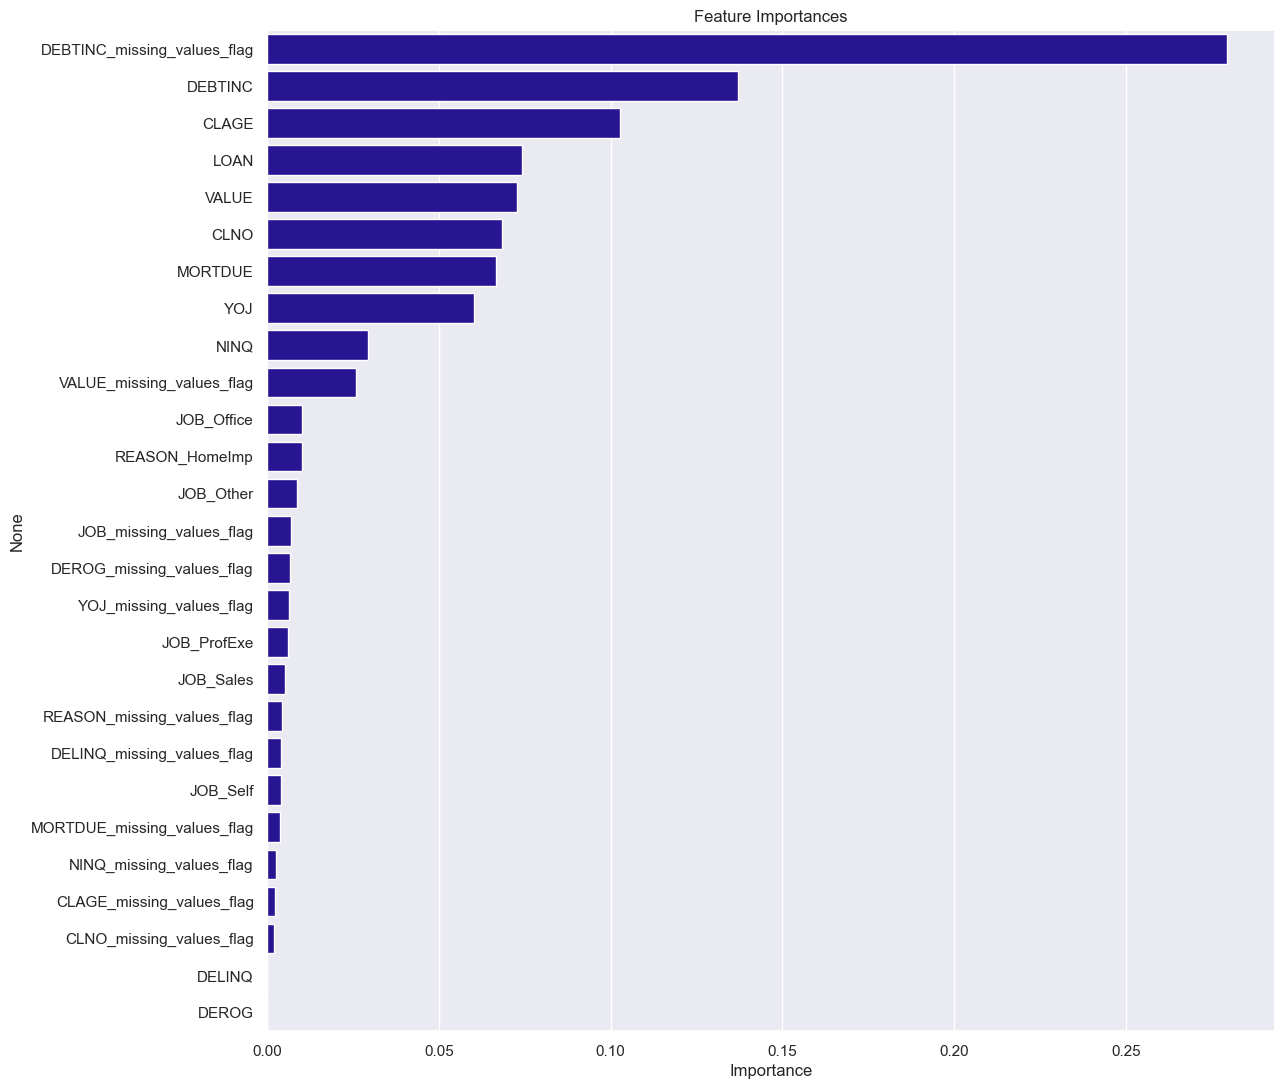

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

importances = rf_estimator_tuned.feature_importances_
columns = X.columns

importance_df = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(13, 13))
sns.barplot(x='Importance', y=importance_df.index, data=importance_df)
plt.title("Feature Importances")
plt.show()


Observations

The feature importance plot for the base model and tuned model are quite similar. 

The model seems to suggest that DEBTINC_missing_value_flag, DEBTINC, CLAGE, and DELINQ are the most important features.
Other important features are VALUE, CLNO, LOAN, and MORTDUE.

# Comparing Model Performances

In [77]:
def get_recall_score(model,flag=True,X_train=x_train,X_test=x_test):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [78]:
##  Function to calculate precision score
def get_precision_score(model,flag=True,X_train=x_train,X_test=x_test):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [79]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True,X_train=x_train,X_test=x_test):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [80]:
# Making the list of all the model names 

#models = [lg, dt, dtree_estimator, rf_estimator, rf_estimator_tuned]
models = [rf_estimator_tuned, rf_estimator, dtree_estimator, dt]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
    
     # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])
    
    # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])

In [81]:
# Mentioning the Model names in the list. 
comparison_frame = pd.DataFrame({'Model':['Tuned Random Forest', 'Random Forest', 'Tuned Decision Tree', 'Decision Tree'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Tuned Random Forest,1.000000,0.888143,1.000000,0.644258,1.000000,0.759076
1,Random Forest,1.000000,0.893177,1.000000,0.644258,1.000000,0.782313
2,Tuned Decision Tree,0.860978,0.854027,0.796875,0.759104,0.617318,0.607623
3,Decision Tree,1.000000,0.856264,1.000000,0.588235,1.000000,0.656250


 Model Insights (Short Version)
Random Forest & Tuned RF had the highest test accuracy (~0.90).

All models overfit except the Tuned Decision Tree.

Tuned Decision Tree had the best recall (~0.74).

Random Forest models had the highest precision (>0.82).

Decision Tree precision (~0.73) was higher than the Tuned Decision Tree (~0.62).